# Akigora

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import messagebox
CE = pd.read_excel('CollectionExperts.xlsx')
CI = pd.read_excel('CollectionInterventions.xlsx')
CU = pd.read_excel('CollectionUser.xlsx')
CN = pd.read_excel('CollectionNewsletter.xlsx')
CR = pd.read_excel('CollectionRecommandation.xlsx')
CC = pd.read_excel('CollectionCompany.xlsx')
CC

,_id,type,companyOrSchool,civility,howWeMet,createdAt,updatedAt,validatedEmail,company.type,company.address,company.tvaNumber,lastConnection,Unnamed: 12,"La colonne ""companyOrSchool"" est une précision du type de client. La collection profile contient les profils de type ""expert"" et ""company"".\nDans les profils de type ""company"" nous faisons la distinctions entre les entreprises (company) et les écoles (school)."
0,65703265c05b1d56a5d21b74,company,company,male,autre,2023-11-06 00:00:00,1701854502362,VRAI,EI,"1 Rue Cabanis, Paris, France",2.1,1.701855e+12,NaN,NaN
1,6570273b843c536c576b98b7,company,company,male,autre,2023-11-06 00:00:00,1701849053210,VRAI,NaN,NaN,NaN,NaN,NaN,NaN
2,656c999b843c536c576b92b7,company,company,female,bouche à oreille,2023-11-03 00:00:00,1701616877948,VRAI,ENCOURS,"1 Avenue Alexander Fleming, Oloron-Sainte-Mari...",20.0,1.701617e+12,NaN,NaN
3,65679f206df3a711cd495148,company,company,female,bouche à oreille,2023-10-29 00:00:00,1701290054508,VRAI,SARL,"17 Avenue du Maréchal de Lattre de Tassigny, V...",20.0,NaN,NaN,NaN
4,65675f556df3a711cd4950df,company,school,female,bouche à oreille,2023-10-29 00:00:00,1701353778806,VRAI,SAS,"46 Rue René Clair, Paris, France",0.0,1.701354e+12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,5bfd619c8837de33a00d28e0,company,NaN,female,autre,2018-10-27 00:00:00,1653395928475,VRAI,SAS,"3 Rue Dr Jean Vincent, 33300 Bordeaux, France",NaN,NaN,NaN,NaN
385,5bd850948837de33a00d285b,company,NaN,male,bouche à oreille,30/010/2018,1653395928402,VRAI,SAS,"36 Boulevard Antoine Gautier, Bordeaux, France",NaN,NaN,NaN,NaN
386,5bc72b6b8837de33a00d2831,company,NaN,male,bouche à oreille,17/010/2018,1653395928368,VRAI,NaN,NaN,NaN,NaN,NaN,NaN
387,5ba1004a48b26d4df25496f1,company,NaN,male,bouche à oreille,2018-09-18 00:00:00,1701784942315,VRAI,SASU,"78 Rue de la Liberté, Bordeaux, France",20.0,1.701785e+12,NaN,NaN


In [81]:
CC = CC.dropna(subset=['howWeMet'])
howWeMet_pivot = CC.pivot_table(index=['howWeMet','companyOrSchool'], values='_id', aggfunc='count').reset_index()
howWeMet_pivot['pct.howWeMet.pivot'] = round((howWeMet_pivot['_id'] / howWeMet_pivot['_id'].sum()) * 100, 2)
howWeMet_pivot = howWeMet_pivot.sort_values(by='pct.howWeMet.pivot', ascending=False)
howWeMet_pivot

,howWeMet,companyOrSchool,_id,pct.howWeMet.pivot
5,bouche à oreille,school,64,28.70
3,autre,school,50,22.42
4,bouche à oreille,company,33,14.80
2,autre,company,26,11.66
7,entreprise partenaire,school,10,4.48
15,recherche web,school,8,3.59
9,linkedin,school,7,3.14
6,entreprise partenaire,company,6,2.69
14,recherche web,company,6,2.69
1,association partenaire,school,4,1.79


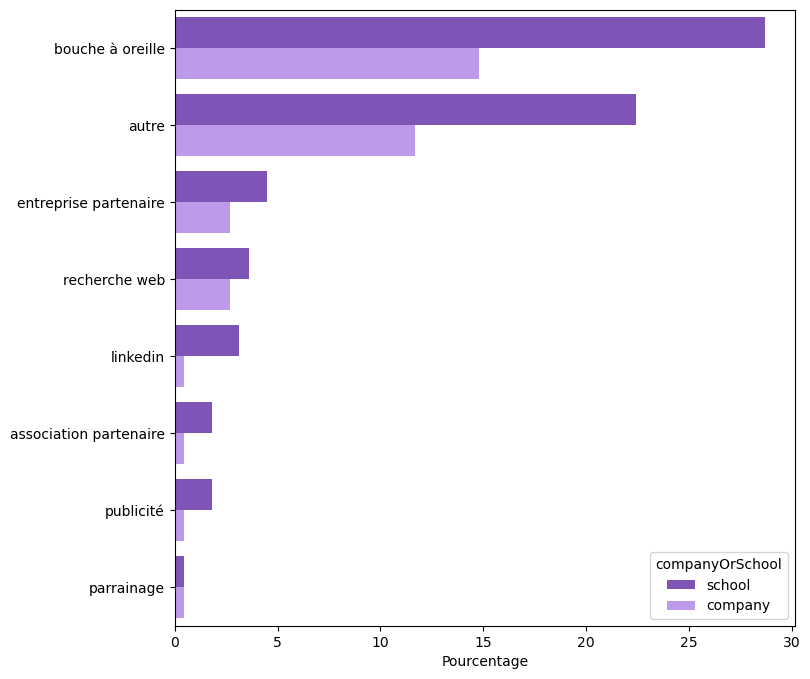

In [79]:

colors = {'company': '#bb8df7', 'school': '#7d43c8'}

plt.figure(figsize=(8, 8))
ax = sns.barplot(y='howWeMet', x='pct.howWeMet.pivot', hue='companyOrSchool' ,data=howWeMet_pivot, palette=colors,  orient='h' )
plt.xlabel("Pourcentage")
plt.ylabel("")
plt.show()

In [56]:
len(CR['expertId'].unique())

277

In [73]:
CN['createdAt'] = pd.to_datetime(CN['createdAt'], unit='ms').dt.date
CN['createdAt'].head(100)

0     2021-10-06
1     2021-10-06
2     2021-10-08
3     2021-10-11
4     2021-10-13
         ...    
78    2023-09-15
79    2023-09-15
80    2023-09-15
81    2023-09-18
82    2023-09-24
Name: createdAt, Length: 83, dtype: object

In [77]:
CN['createdAt'] = pd.to_datetime(CN['createdAt']).dt.to_period('M')

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [74]:
cn_date = CN.pivot_table(index=['type','createdAt'], values='createdAt', aggfunc='count').reset_index()
cn_date 

,type,createdAt,_id
0,company,2021-10-11,1
1,company,2021-11-29,1
2,company,2021-11-30,1
3,company,2022-04-22,1
4,company,2022-05-29,1
...,...,...,...
72,expert,2023-06-30,1
73,expert,2023-09-12,1
74,expert,2023-09-15,2
75,expert,2023-09-18,1


TypeError: Invalid object type at position 0

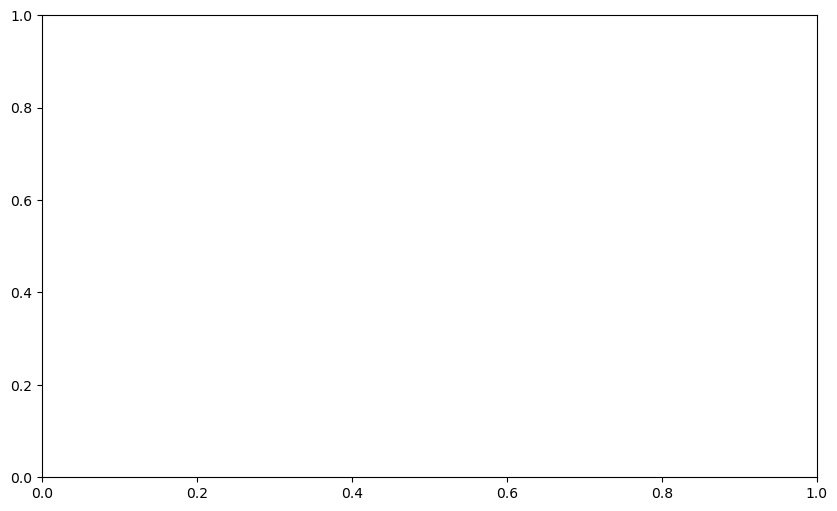

In [52]:
cn_date = CN.pivot_table(index=['type', 'createdAt'], values='_id', aggfunc='count').reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='createdAt', y='_id', hue='type', data=cn_date, palette="husl")

plt.title("Fréquence des types de newsletter au fil du temps")
plt.xlabel("Date de création")
plt.ylabel("Nombre de newsletters")
plt.show()


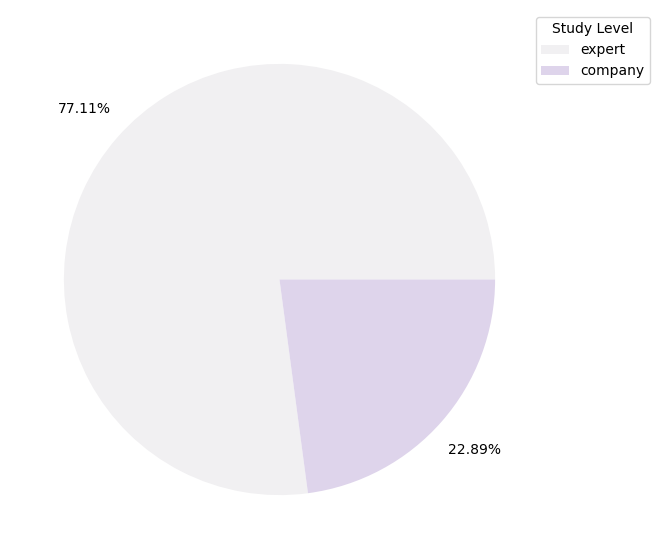

In [4]:
pcttype = CN['type'].value_counts()
labels = pcttype
num_colors = 7
colors = sns.color_palette("light:#7d43c8", n_colors=num_colors)
plt.figure(figsize=(7, 7))
plt.pie(pcttype, autopct='%.2f%%', colors=colors, pctdistance=1.2)
plt.legend(labels.index, loc="upper right", title="Study Level", bbox_to_anchor=(1.2, 1))
plt.show()


In [14]:
#merged_df = pd.merge(CI, CE, left_on='expert_userId', right_on='userId', how='right')
merged_df = pd.merge(CE, CI, left_on='userId', right_on='expert_userId', how='left')
#merged_df2 = pd.merge(CU, CI, left_on='_id', right_on='expert_userId', how='inner')
#final_merged_df = pd.merge(merged_df, merged_df2, left_on='expert_userId', right_on='expert_userId', how='inner')

In [16]:
note = merged_df.pivot_table(index='name', values=['note_communication','note_quality','note_level'])
note

,note_communication,note_level,note_quality
name,,,
Ali Dardour Claire Garnier,5.0,5.0,5.0
Frédéric PETOT Anthony LE DUIGOU,4.5,5.0,5.0
GRABER DOMINIQUE SAUREL STEPHANE,5.0,5.0,5.0
Gilles Dauguet Clément LEPOT,5.0,5.0,5.0
"Quatre, Thierry",5.0,4.0,5.0


In [15]:
merged_df

,_id_x,type,userId,createdAt_x,updatedAt_x,domains,sectors,studyLevel,studyTitle,location,...,presentiel_distanciel,isClosed,forfait_remuneration,status,createdAt_y,updatedAt_y,hours_planned,note_communication,note_quality,note_level
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,01/11/2023,1701460182590,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,01/11/2023,1701448860078,NaN,NaN,NaN,NaN,Bordeaux et périphérie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,01/11/2023,1701426872307,Informatique / Télécoms,Informatique et Cybersécurité,Bac5,Ingénieur,Toulouse et périphérie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,30/10/2023,1701439187742,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,"Saint-Étienne, Loire, Lyon, paris,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,30/10/2023,1701364372080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,20/09/2018,1635344634005,Services aux entreprises,NaN,NaN,NaN,"Bordeaux, France",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2791,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,20/09/2018,1635344634004,Commerce / Négoce / Distribution,NaN,NaN,NaN,"Libourne, France",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2792,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,19/09/2018,1660553442806,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...","Bordeaux, France",...,NaN,VRAI,hourly,terminated,2023-09-19 00:00:00,1.695110e+12,18,NaN,NaN,NaN
2793,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,13/09/2018,1652341680180,Commerce / Négoce / Distribution,Direction et Administration,NaN,NaN,Bordeaux,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
CI['hours_planned'] = pd.to_numeric(CI['hours_planned'], errors='coerce')
CI['hours_planned'].count()

491

In [59]:
merged_df3 = pd.merge(CE, CR, left_on='_id', right_on='expertId', how='inner')
merged_df3 

,_id_x,type,userId,createdAt_x,updatedAt_x,domains,sectors,studyLevel,studyTitle,location,...,company_name,company_function,phone,mail,_id_y,status,expertId,createdAt_y,updatedAt_y,receivedAt
0,6564a618ddcee07998d010c2,expert,6564a618ddcee07998d010c1,27/10/2023,1701096359599,Commerce / Négoce / Distribution,Commerce,Bac5,Master e-business,"Bordeaux, France",...,Biason,Directeur,0102030405,test@test.test,6564ae1bddcee07998d010ca,hidden,6564a618ddcee07998d010c2,2023-10-27 00:00:00,1.701098e+12,1.701098e+12
1,65140970752b341f180e8f67,expert,65140970752b341f180e8f66,27/09/2023,1697485908217,Management,Direction et Administration,Bac5,Master 2,"Bordeaux, France",...,Centre de formation Polyclinique Bordeaux nord...,Directrice Directeur général du groupe,06 09 89 19 38 06 74 44 59 31,patrick.faugerolas@ch-sudgironde.fr,652904cd5b0ddd07d925bf54,sent,65140970752b341f180e8f67,13/010/2023,1.697187e+12,NaN
2,65128b6490c59951daf90f77,expert,65128b6490c59951daf90f76,26/09/2023,1701075052427,Santé / Social / Sport et loisirs,Direction et Administration,Bac5,Executive Master Gestion et Politiques de Sant...,"Lyon, France",...,E.P.M.S.D de Coutras ADEQUATION Santé,DRH Consultant co-associé,0674531583 0615025677,loicpirron@hotmail.fr houbron.adequationsante@...,6517e28dd2ebbd6640a8216a,hidden,65128b6490c59951daf90f77,2023-09-30 00:00:00,1.696065e+12,1.696065e+12
3,65128b6490c59951daf90f77,expert,65128b6490c59951daf90f76,26/09/2023,1701075052427,Santé / Social / Sport et loisirs,Direction et Administration,Bac5,Executive Master Gestion et Politiques de Sant...,"Lyon, France",...,E.P.M.S.D de Coutras ADEQUATION Santé,DRH Consultant co-associé,0674531583 0615025677,loicpirron@hotmail.fr houbron.adequationsante@...,65153936752b341f180e928e,shown,65128b6490c59951daf90f77,2023-09-28 00:00:00,1.696048e+12,1.695998e+12
4,65128b6490c59951daf90f77,expert,65128b6490c59951daf90f76,26/09/2023,1701075052427,Santé / Social / Sport et loisirs,Direction et Administration,Bac5,Executive Master Gestion et Politiques de Sant...,"Lyon, France",...,E.P.M.S.D de Coutras ADEQUATION Santé,DRH Consultant co-associé,0674531583 0615025677,loicpirron@hotmail.fr houbron.adequationsante@...,651538dd752b341f180e928d,sent,65128b6490c59951daf90f77,2023-09-28 00:00:00,1.695890e+12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,20/09/2018,1635344634005,Services aux entreprises,NaN,NaN,NaN,"Bordeaux, France",...,None,None,None,None,5ce6a195b0c8341cdddda0fb,shown,5ba3acee48b26d4df2549702,2019-05-23 00:00:00,1.558950e+12,1.558693e+12
929,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,20/09/2018,1635344634005,Services aux entreprises,NaN,NaN,NaN,"Bordeaux, France",...,None,None,None,None,5ce6a187b0c8341cdddda0fa,shown,5ba3acee48b26d4df2549702,2019-05-23 00:00:00,1.559112e+12,1.559052e+12
930,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,20/09/2018,1635344634005,Services aux entreprises,NaN,NaN,NaN,"Bordeaux, France",...,None,None,None,None,5ce27b5d44870d61541d68d8,sent,5ba3acee48b26d4df2549702,2019-05-20 00:00:00,1.558347e+12,NaN
931,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,20/09/2018,1635344634005,Services aux entreprises,NaN,NaN,NaN,"Bordeaux, France",...,None,None,None,None,5ce27ac844870d61541d68d7,shown,5ba3acee48b26d4df2549702,2019-05-20 00:00:00,1.558685e+12,1.558643e+12


In [58]:
drop_name = merged_df3.dropna(subset=['name'])
reco = drop_name['name'].drop_duplicates()
nbre_reco = reco.count()
nbre_reco

580

In [2]:
CE.dtypes

_id                                      object
type                                     object
userId                                   object
createdAt                                object
updatedAt                                 int64
domains                                  object
sectors                                  object
studyLevel                               object
studyTitle                               object
location                                 object
location2                                object
mobility                                 object
daily_hourly_prices.daily_price_min     float64
daily_hourly_prices.daily_price_max     float64
daily_hourly_prices.hourly_price_min    float64
daily_hourly_prices.hourly_price_max    float64
availabilities.availability_min         float64
availabilities.availability_max         float64
experiences                              object
references                               object
visible                                 

In [3]:
CE['updatedAt'] = pd.to_datetime(CE['updatedAt'], unit='ms').dt.date
CE['updatedAt'].head(100)

0     2023-12-01
1     2023-12-01
2     2023-12-01
3     2023-12-01
4     2023-11-30
         ...    
95    2023-10-17
96    2023-10-25
97    2023-10-31
98    2023-10-15
99    2023-10-26
Name: updatedAt, Length: 100, dtype: object

ValueError: time data "30/10/2023" doesn't match format "%m/%d/%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [4]:
CE['updatedAt'].value_counts()

updatedAt
2021-10-27    521
2023-01-25     47
2022-12-03     36
2023-09-02     26
2023-11-21     19
             ... 
2023-02-25      1
2022-06-21      1
2022-06-20      1
2022-09-29      1
2022-08-15      1
Name: count, Length: 537, dtype: int64

In [5]:
ref = CE.loc[2,"references"]
ref

'[{"name":"Gardeur, Sylvain","company_name":"Airbus Defence and Space","company_function":"Team leader Ingénierie Systèmes et IVV segments sol","phone":"07 76 17 91 07","mail":"sylvain.gardeur@airbus.com"},{"name":"Dufrenne, Yves","company_name":"Airbus Defence and Space","company_function":"Expert cybersécurité groupe Airbus","phone":"06 56 88 33 27","mail":"yves.dufrenne@airbus.com"}]'

# Nb.d'experts inscrits sur la plateforme par période

In [6]:
CE.pivot_table(index='type', values='userId', aggfunc='count')

,userId
type,
expert,2455


In [6]:
CE['type'].count()

2455

In [7]:
CE['createdAt'].value_counts()

createdAt
29/09/2023     16
26/09/2023     16
19/01/2022     13
16/03/2022     10
20/05/2022      8
               ..
31/010/2021     1
30/010/2021     1
27/010/2021     1
18/010/2021     1
30/07/2018      1
Name: count, Length: 1129, dtype: int64

In [8]:
CE['createdAt'] = CE['createdAt'].str.replace("010","10")

In [9]:
CE['createdAt'] = pd.to_datetime(CE['createdAt'], dayfirst=True)
CE['createdAt'].head(100)

0    2023-11-01
1    2023-11-01
2    2023-11-01
3    2023-10-30
4    2023-10-30
        ...    
95   2023-10-17
96   2023-10-17
97   2023-10-16
98   2023-10-15
99   2023-10-13
Name: createdAt, Length: 100, dtype: datetime64[ns]

In [10]:
result = CE.pivot_table(index='createdAt', values='userId', aggfunc='count').reset_index()
result

,createdAt,userId
0,2018-07-30,1
1,2018-09-13,1
2,2018-09-19,1
3,2018-09-20,2
4,2018-09-24,1
...,...,...
1055,2023-10-28,1
1056,2023-10-29,4
1057,2023-10-30,10
1058,2023-10-31,3


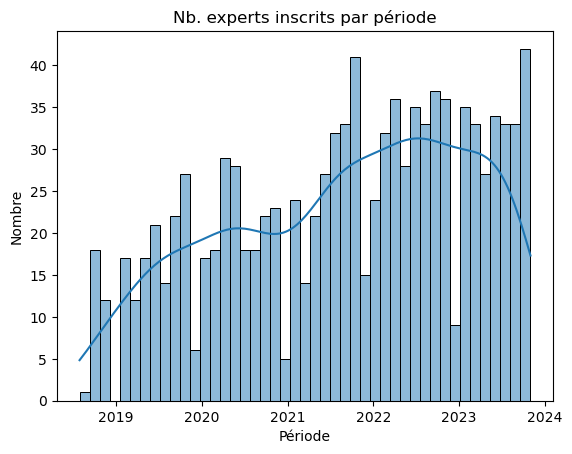

In [11]:
sns.histplot(result['createdAt'], kde=True, bins=45)
plt.xlabel('Période')
plt.ylabel('Nombre')
plt.title('Nb. experts inscrits par période')
plt.show()

# Nb. d'experts visibles sur la plateforme.
    - Experts avec un taux de complétion de 100% et qui ont réalisé leur entretien.

In [12]:
NBE = CE[(CE["visible"] == True) & (CE["percentage"] == 100.0) & (CE["done"] == True)]
NBE

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experiences,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,2023-10-30,2023-12-01,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,"Saint-Étienne, Loire, Lyon, paris,",...,"[{""date"":1172703600000,""dateEnd"":1565820000000...","[{""name"":""Verrier Béatrice"",""company_name"":""IC...",1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
9,6566fc106df3a711cd494ff7,expert,6566fc106df3a711cd494ff6,2023-10-29,2023-12-01,Industrie,Commerce,Bac5,Master - Ecole de commerce,Paris,...,"[{""date"":1356994800000,""dateEnd"":1598824800000...","[{""name"":""Jullien Frédéric"",""company_name"":""Fi...",1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
18,656077064054c942bf3e91c8,expert,656077064054c942bf3e91c7,2023-10-24,2023-11-30,Management,Autre,Bac5,Master Entrepreneuriat et Management de projets,"Bordeaux, France",...,"[{""date"":1574895600000,""dateEnd"":"""",""company"":...","[{""name"":"""",""company_name"":"""",""company_functio...",1.0,100.0,NaN,Entre 5 et 10 ans,1.0,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
20,655f253c4c24a02f8f55ea8e,expert,655f253c4c24a02f8f55ea8d,2023-10-23,2023-11-30,Édition / Communication / Information,Marketing et communication,Bac5,Master en Science du Marketing et du Brand Man...,"Marseille, France",...,"[{""date"":1551654000000,""dateEnd"":1567116000000...","[{""name"":"""",""company_name"":"""",""company_functio...",1.0,100.0,NaN,Entre 5 et 10 ans,1.0,0.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
22,655cd9d60972f25b9dfca7a7,expert,655cd9d60972f25b9dfca7a6,2023-10-21,2023-11-27,Informatique / Télécoms,Commerce,Bac4,Master Coach Professionnel RNCP6,BORDEAUX,...,"[{""date"":1483311600000,""dateEnd"":1665525600000...","[{""name"":""Gary Guillier Marcelin "",""company_na...",1.0,100.0,NaN,Entre 15 et 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,5bc4a282f1543204a60cb0bd,expert,5bc4a282f1543204a60cb0bc,2018-10-15,2022-08-22,Enseignement / Recherche / Formation,Commerce,NaN,NaN,"Bordeaux, France",...,"[{""date"":1509490800000,""dateEnd"":"""",""city"":""Bo...",NaN,1.0,100.0,NaN,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2441,5bb3d0a748b26d4df2549729,expert,5bb3d0a748b26d4df2549728,2018-10-02,2022-05-12,Études et conseils,Ressources Humaines,NaN,NaN,"Châlons-en-Champagne, France",...,"[{""date"":1483225200000,""dateEnd"":"""",""city"":""CH...",NaN,1.0,100.0,NaN,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2443,5bab904248b26d4df2549717,expert,5bab904248b26d4df2549716,2018-09-26,2022-05-12,Commerce / Négoce / Distribution,Commerce,NaN,NaN,"Paris, France",...,"[{""date"":1598997600000,""dateEnd"":"""",""city"":""pa...",NaN,1.0,100.0,NaN,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,2018-09-19,2022-08-15,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...","Bordeaux, France",...,"[{""date"":1483225200000,""dateEnd"":1546297200000...","[{""name"":""Anne Boisseau"",""company_name"":""GEMA""...",1.0,100.0,NaN,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."


In [13]:
NBE.pivot_table(index=['createdAt','type','visible','percentage','done'], values=['userId'], aggfunc='count').reset_index()

,createdAt,type,visible,percentage,done,userId
0,2018-09-13,expert,1.0,100.0,1.0,1
1,2018-09-19,expert,1.0,100.0,1.0,1
2,2018-09-26,expert,1.0,100.0,1.0,1
3,2018-10-02,expert,1.0,100.0,1.0,1
4,2018-10-15,expert,1.0,100.0,1.0,1
...,...,...,...,...,...,...
736,2023-10-27,expert,1.0,100.0,1.0,1
737,2023-10-28,expert,1.0,100.0,1.0,1
738,2023-10-29,expert,1.0,100.0,1.0,2
739,2023-10-30,expert,1.0,100.0,1.0,6


In [14]:
CE_visible = NBE.groupby(["visible", "percentage", "done"]).size().reset_index(name='count')
CE_visible

,visible,percentage,done,count
0,1.0,100.0,1.0,1301


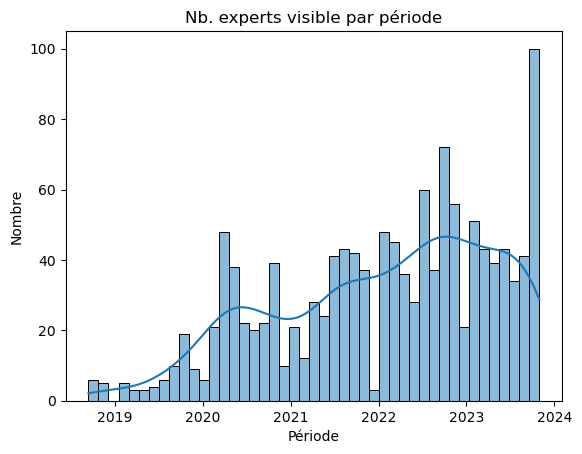

In [15]:
sns.histplot(NBE['createdAt'], kde=True, bins=45)
plt.xlabel('Période')
plt.ylabel('Nombre')
plt.title('Nb. experts visible par période')
plt.show()

# % d'experts à profil complété à 100% 

In [16]:
NBE100 = CE[(CE["percentage"] == 100.0) & (CE["done"] == True)]
NBE100

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experiences,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,2023-10-30,2023-12-01,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,"Saint-Étienne, Loire, Lyon, paris,",...,"[{""date"":1172703600000,""dateEnd"":1565820000000...","[{""name"":""Verrier Béatrice"",""company_name"":""IC...",1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
9,6566fc106df3a711cd494ff7,expert,6566fc106df3a711cd494ff6,2023-10-29,2023-12-01,Industrie,Commerce,Bac5,Master - Ecole de commerce,Paris,...,"[{""date"":1356994800000,""dateEnd"":1598824800000...","[{""name"":""Jullien Frédéric"",""company_name"":""Fi...",1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
18,656077064054c942bf3e91c8,expert,656077064054c942bf3e91c7,2023-10-24,2023-11-30,Management,Autre,Bac5,Master Entrepreneuriat et Management de projets,"Bordeaux, France",...,"[{""date"":1574895600000,""dateEnd"":"""",""company"":...","[{""name"":"""",""company_name"":"""",""company_functio...",1.0,100.0,NaN,Entre 5 et 10 ans,1.0,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
20,655f253c4c24a02f8f55ea8e,expert,655f253c4c24a02f8f55ea8d,2023-10-23,2023-11-30,Édition / Communication / Information,Marketing et communication,Bac5,Master en Science du Marketing et du Brand Man...,"Marseille, France",...,"[{""date"":1551654000000,""dateEnd"":1567116000000...","[{""name"":"""",""company_name"":"""",""company_functio...",1.0,100.0,NaN,Entre 5 et 10 ans,1.0,0.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
22,655cd9d60972f25b9dfca7a7,expert,655cd9d60972f25b9dfca7a6,2023-10-21,2023-11-27,Informatique / Télécoms,Commerce,Bac4,Master Coach Professionnel RNCP6,BORDEAUX,...,"[{""date"":1483311600000,""dateEnd"":1665525600000...","[{""name"":""Gary Guillier Marcelin "",""company_na...",1.0,100.0,NaN,Entre 15 et 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,5bc4a282f1543204a60cb0bd,expert,5bc4a282f1543204a60cb0bc,2018-10-15,2022-08-22,Enseignement / Recherche / Formation,Commerce,NaN,NaN,"Bordeaux, France",...,"[{""date"":1509490800000,""dateEnd"":"""",""city"":""Bo...",NaN,1.0,100.0,NaN,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2441,5bb3d0a748b26d4df2549729,expert,5bb3d0a748b26d4df2549728,2018-10-02,2022-05-12,Études et conseils,Ressources Humaines,NaN,NaN,"Châlons-en-Champagne, France",...,"[{""date"":1483225200000,""dateEnd"":"""",""city"":""CH...",NaN,1.0,100.0,NaN,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2443,5bab904248b26d4df2549717,expert,5bab904248b26d4df2549716,2018-09-26,2022-05-12,Commerce / Négoce / Distribution,Commerce,NaN,NaN,"Paris, France",...,"[{""date"":1598997600000,""dateEnd"":"""",""city"":""pa...",NaN,1.0,100.0,NaN,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,2018-09-19,2022-08-15,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...","Bordeaux, France",...,"[{""date"":1483225200000,""dateEnd"":1546297200000...","[{""name"":""Anne Boisseau"",""company_name"":""GEMA""...",1.0,100.0,NaN,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."


In [17]:
result1 = CE.pivot_table(index=['done','percentage'], values='userId', aggfunc='count').reset_index()
result1['pct'] = round((result1['userId'] / result1['userId'].sum()) * 100, 2)
result1

,done,percentage,userId,pct
0,0.0,91.0,5,0.31
1,0.0,100.0,4,0.25
2,1.0,0.0,1,0.06
3,1.0,45.0,3,0.19
4,1.0,50.0,2,0.13
5,1.0,55.0,131,8.20
6,1.0,64.0,4,0.25
7,1.0,67.0,4,0.25
8,1.0,73.0,6,0.38
9,1.0,75.0,6,0.38


In [18]:
percentage_experts = result1[(result1["percentage"] == 100.0) & (result1["done"] == True)]
percentage_experts

,done,percentage,userId,pct
14,1.0,100.0,1323,82.84


In [19]:
import tkinter as tk
from tkinter import scrolledtext

# Assuming `result` and `CE` are already defined

def show_percentage_experts():
    percentage_experts = result1[(result1["percentage"] == 100.0) & (result1["done"] == True)]
    display_text = percentage_experts.to_string()  # Convert DataFrame to string for display
    text_area.delete(1.0, tk.END)  # Clear previous content
    text_area.insert(tk.END, display_text)  # Display the new content

def export_percentage_experts():
    NBE100 = CE[(CE["percentage"] == 100.0) & (CE["done"] == True)]
    
    # Export the DataFrame to Excel
    NBE100.to_excel("NBE100.xlsx", index=False)
    
    display_text = f"Data exported to 'NBE100.xlsx'"
    text_area.delete(1.0, tk.END)
    text_area.insert(tk.END, display_text)

# Create the main window
window = tk.Tk()
window.title("Percentage Experts Viewer")

# Create buttons
show_button = tk.Button(window, text="Show Percentage Experts", command=show_percentage_experts)
show_button.pack(pady=10)

export_button = tk.Button(window, text="Export Percentage Experts", command=export_percentage_experts)
export_button.pack(pady=10)

# Create a scrolled text area for displaying results
text_area = scrolledtext.ScrolledText(window, width=40, height=10, wrap=tk.WORD)
text_area.pack(padx=10, pady=10)

# Start the Tkinter event loop
window.mainloop()


# % d'experts par domaine d'intervention 

In [20]:
result2 = CE.pivot_table(index='domains', values='userId', aggfunc='count').reset_index()
result2['pct'] = round((result2['userId'] / result2['userId'].sum()) * 100, 1)
result2

,domains,userId,pct
0,Agroalimentaire / Agriculture,58,2.7
1,Architecture / Paysage / Urbanisme,13,0.6
2,Armée / Sécurité,7,0.3
3,Arts / Artisanat / Culture,28,1.3
4,BTP - Immobilier,2,0.1
5,BTP / Construction,33,1.5
6,Banque / Assurance,62,2.9
7,Bois / Papier / Carton,4,0.2
8,Chimie / Parachimie / Pharmacie,24,1.1
9,Commerce / Négoce / Distribution,266,12.5


In [ ]:
result2 = CE.pivot_table(index='domains', values='userId', aggfunc='count').reset_index()
result2['pct'] = round((result2['userId'] / result2['userId'].sum()) * 100, 1)
result2

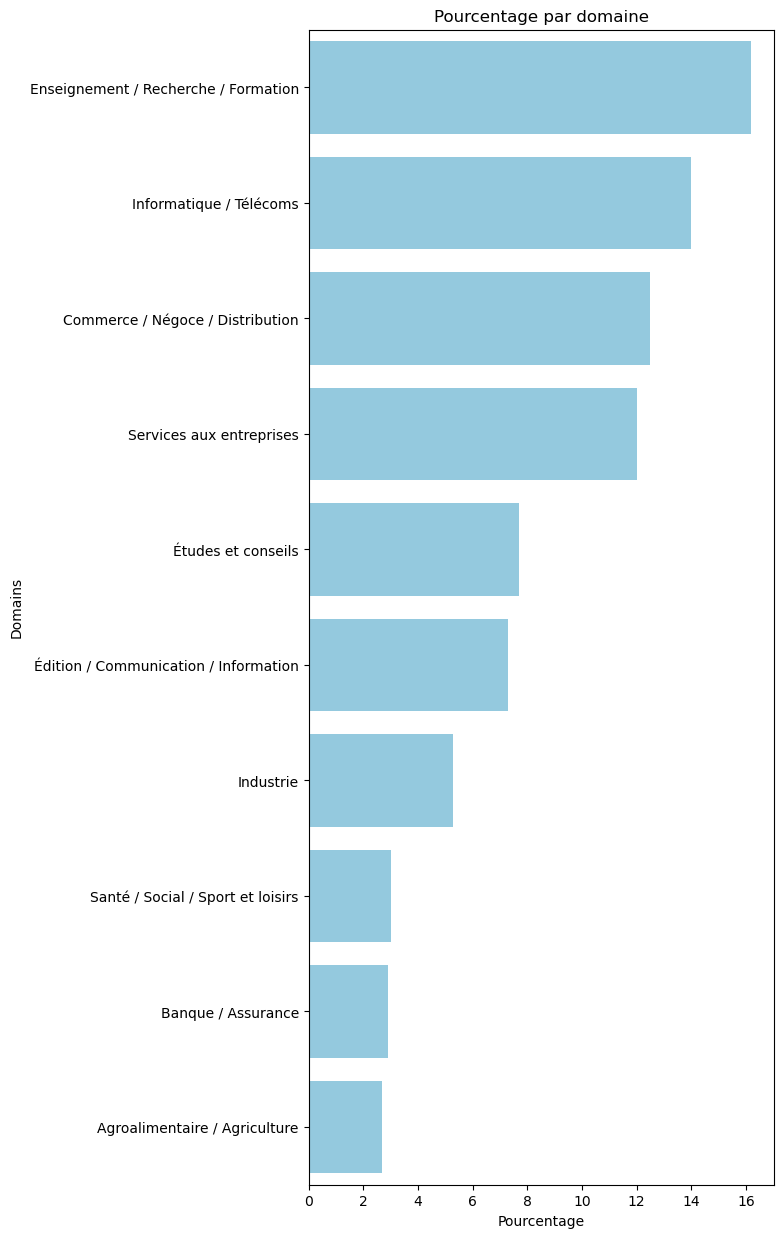

In [21]:
result2 = result2.sort_values(by='pct', ascending=False).head(10)

# Création du graphique à l'aide de Seaborn
plt.figure(figsize=(6, 15))
sns.barplot(x='pct', y='domains', data=result2, color='skyblue', orient='h')


plt.ylabel('Domains')
plt.xlabel('Pourcentage')
plt.title('Pourcentage par domaine')
plt.show()

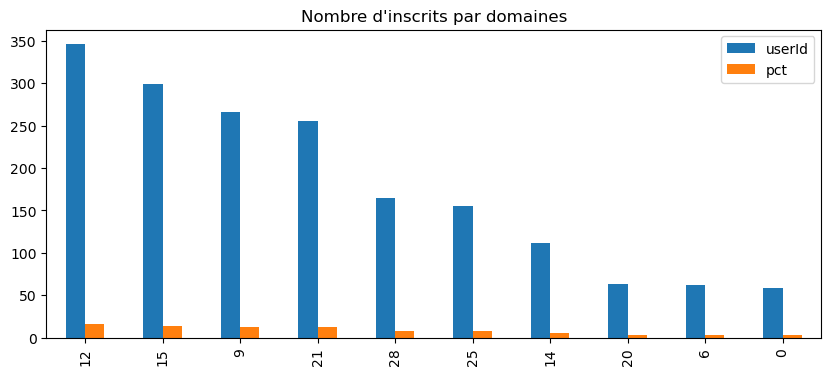

In [22]:
fig, ax = plt.subplots(figsize=(10,4))
result2.plot(kind='bar', ax=ax)
plt.title("Nombre d'inscrits par domaines")
plt.show()

# % d'experts par ville 

In [23]:
CE["location"] = CE["location"].str.split(',').str[0]
CE

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experiences,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,2023-11-01,2023-12-01,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,"[{""date"":"""",""dateEnd"":"""",""company"":"""",""job"":""""...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,2023-11-01,2023-12-01,NaN,NaN,NaN,NaN,Bordeaux et périphérie,...,"[{""company"":""Akigora.com"",""job"":""Développeur w...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,0.0,1.0,NaN,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,2023-11-01,2023-12-01,Informatique / Télécoms,Informatique et Cybersécurité,Bac5,Ingénieur,Toulouse et périphérie,...,"[{""date"":612396000000,""dateEnd"":1688421600000,...","[{""name"":""Gardeur, Sylvain"",""company_name"":""Ai...",1.0,100.0,1.0,+ de 25 ans,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,2023-10-30,2023-12-01,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,Saint-Étienne,...,"[{""date"":1172703600000,""dateEnd"":1565820000000...","[{""name"":""Verrier Béatrice"",""company_name"":""IC...",1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,2023-10-30,2023-11-30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,2018-09-20,2021-10-27,Services aux entreprises,NaN,NaN,NaN,Bordeaux,...,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",NaN,1.0,55.0,NaN,NaN,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,2018-09-20,2021-10-27,Commerce / Négoce / Distribution,NaN,NaN,NaN,Libourne,...,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",NaN,1.0,55.0,NaN,NaN,1.0,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,2018-09-19,2022-08-15,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...",Bordeaux,...,"[{""date"":1483225200000,""dateEnd"":1546297200000...","[{""name"":""Anne Boisseau"",""company_name"":""GEMA""...",1.0,100.0,NaN,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,2018-09-13,2022-05-12,Commerce / Négoce / Distribution,Direction et Administration,NaN,NaN,Bordeaux,...,"[{""date"":1064786400000,""dateEnd"":"""",""city"":""PE...",NaN,1.0,100.0,NaN,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."


In [24]:
CE["location"] = CE["location"].replace(["Bordeaux et périphérie"], "Bordeaux")

In [25]:
CE["location"] = CE["location"].replace(["Paris et périphérie"], "Paris")

In [26]:
CE["location"] = CE["location"].replace(["Île-de-France"], "Paris")

In [27]:
CE["location"] = CE["location"].replace(["Lyon et périphérie"], "Lyon")

In [28]:
CE["location"] = CE["location"].replace(["Lille et périphérie"], "Lille")

In [29]:
CE["location"] = CE["location"].replace(["Toulouse et périphérie"], "Toulouse")

In [30]:
CE["location"] = CE["location"].replace(["Montpellier et périphérie"], "Montpellier")

In [31]:
CE["location"] = CE["location"].replace(["Nantes et périphérie"], "Nantes")

In [32]:
CE["location"] = CE["location"].replace(["Nouvelle-Aquitaine"], "Bordeaux")

In [33]:
CE["location"] = CE["location"].replace(["Bordeaux Métropole"], "Bordeaux")

In [34]:
CE["location"] = CE["location"].replace(["Bordeaux "], "Bordeaux")

In [35]:
CE["location"] = CE["location"].replace("France", np.nan)

In [36]:
CE["location"] = CE["location"].replace(["BORDEAUX"], "Bordeaux")

In [37]:
CE["location"] = CE["location"].replace(["Gironde"], "Bordeaux")

In [38]:
CE["location"] = CE["location"].replace(["Aquitaine"], "Bordeaux")

In [39]:
experts_par_ville = CE["location"].value_counts().nlargest(10)
experts_par_ville

location
Bordeaux       995
Paris          260
Lyon           131
Toulouse        70
Nantes          59
Lille           50
Montpellier     26
Bayonne         19
Angoulême       18
Marseille       17
Name: count, dtype: int64

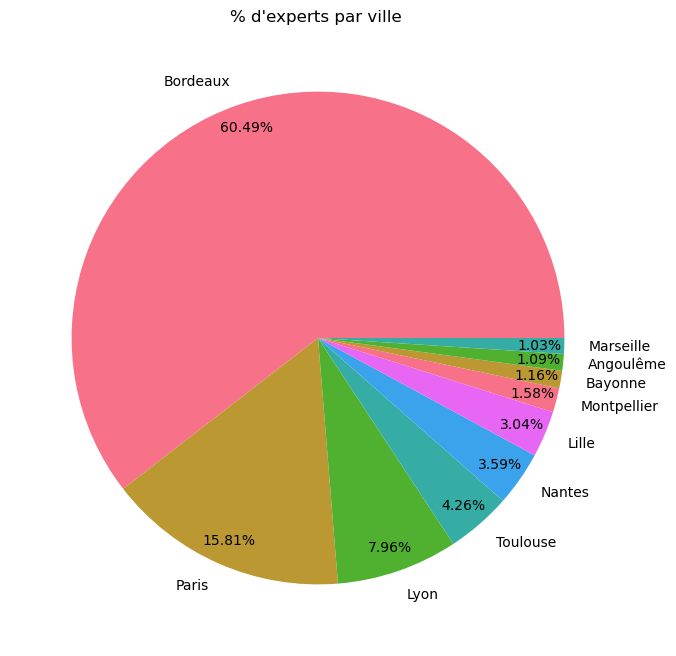

In [40]:
labels = experts_par_ville
colors = sns.color_palette("husl")
plt.figure(figsize=(8, 8))
plt.pie(experts_par_ville, autopct='%.2f%%', labels=labels.index, pctdistance=0.9, colors=colors)
plt.title("% d'experts par ville ")
plt.show()

# Nb. d'entretiens passés par période

In [41]:
CE["done"] = CE["done"].replace(np.nan, "Non renseigné")

In [42]:
CE["done"] = CE["done"].replace(1.0, "Oui")

In [43]:
CE["done"] = CE["done"].replace(0.0, "Non")

In [44]:
result3 = CE["done"].value_counts()
result3

done
Oui              1590
Non renseigné     856
Non                 9
Name: count, dtype: int64

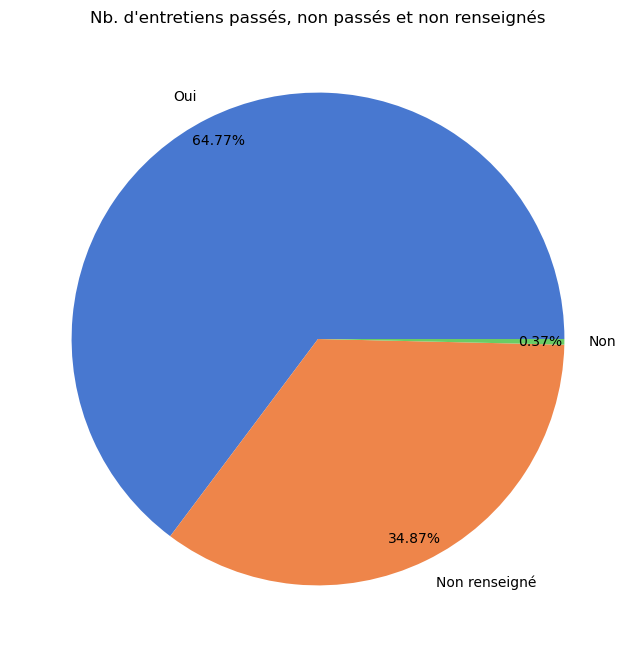

In [45]:
labels = result3
colors = sns.color_palette("muted", 3)
plt.figure(figsize=(8, 8))
plt.pie(result3, autopct='%.2f%%', labels=labels.index, pctdistance=0.9, colors=colors)
plt.title("Nb. d'entretiens passés, non passés et non renseignés")
plt.show()

In [46]:
result4 = CE[CE["done"] == "Oui"]
result4

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experiences,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,2023-10-30,2023-12-01,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,Saint-Étienne,...,"[{""date"":1172703600000,""dateEnd"":1565820000000...","[{""name"":""Verrier Béatrice"",""company_name"":""IC...",1.0,100.0,NaN,+ de 25 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
9,6566fc106df3a711cd494ff7,expert,6566fc106df3a711cd494ff6,2023-10-29,2023-12-01,Industrie,Commerce,Bac5,Master - Ecole de commerce,Paris,...,"[{""date"":1356994800000,""dateEnd"":1598824800000...","[{""name"":""Jullien Frédéric"",""company_name"":""Fi...",1.0,100.0,NaN,+ de 25 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
18,656077064054c942bf3e91c8,expert,656077064054c942bf3e91c7,2023-10-24,2023-11-30,Management,Autre,Bac5,Master Entrepreneuriat et Management de projets,Bordeaux,...,"[{""date"":1574895600000,""dateEnd"":"""",""company"":...","[{""name"":"""",""company_name"":"""",""company_functio...",1.0,100.0,NaN,Entre 5 et 10 ans,Oui,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
20,655f253c4c24a02f8f55ea8e,expert,655f253c4c24a02f8f55ea8d,2023-10-23,2023-11-30,Édition / Communication / Information,Marketing et communication,Bac5,Master en Science du Marketing et du Brand Man...,Marseille,...,"[{""date"":1551654000000,""dateEnd"":1567116000000...","[{""name"":"""",""company_name"":"""",""company_functio...",1.0,100.0,NaN,Entre 5 et 10 ans,Oui,0.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
22,655cd9d60972f25b9dfca7a7,expert,655cd9d60972f25b9dfca7a6,2023-10-21,2023-11-27,Informatique / Télécoms,Commerce,Bac4,Master Coach Professionnel RNCP6,Bordeaux,...,"[{""date"":1483311600000,""dateEnd"":1665525600000...","[{""name"":""Gary Guillier Marcelin "",""company_na...",1.0,100.0,NaN,Entre 15 et 25 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,2018-09-20,2021-10-27,Services aux entreprises,NaN,NaN,NaN,Bordeaux,...,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",NaN,1.0,55.0,NaN,NaN,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,2018-09-20,2021-10-27,Commerce / Négoce / Distribution,NaN,NaN,NaN,Libourne,...,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",NaN,1.0,55.0,NaN,NaN,Oui,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,2018-09-19,2022-08-15,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...",Bordeaux,...,"[{""date"":1483225200000,""dateEnd"":1546297200000...","[{""name"":""Anne Boisseau"",""company_name"":""GEMA""...",1.0,100.0,NaN,+ de 30 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,2018-09-13,2022-05-12,Commerce / Négoce / Distribution,Direction et Administration,NaN,NaN,Bordeaux,...,"[{""date"":1064786400000,""dateEnd"":"""",""city"":""PE...",NaN,1.0,100.0,NaN,20 à 30 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."


In [47]:
result_done_yes = result4.pivot_table(index=['createdAt'], values=['done'], aggfunc='count').reset_index()
result_done_yes

,createdAt,done
0,2018-07-30,1
1,2018-09-13,1
2,2018-09-19,1
3,2018-09-20,2
4,2018-09-24,1
...,...,...
887,2023-10-27,1
888,2023-10-28,1
889,2023-10-29,2
890,2023-10-30,6


In [48]:
CE['done'].value_counts()

done
Oui              1590
Non renseigné     856
Non                 9
Name: count, dtype: int64

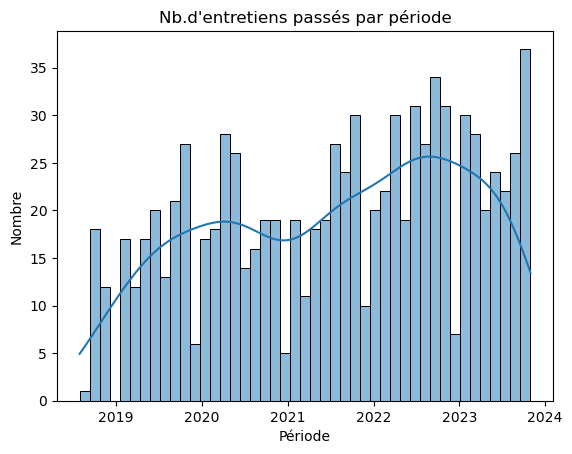

In [49]:
sns.histplot(result_done_yes['createdAt'], kde=True, bins=45)
plt.xlabel('Période')
plt.ylabel('Nombre')
plt.title("Nb.d'entretiens passés par période")
plt.show()

# % d'experts à profil non complété inf. 100

In [50]:
EVF = CE[CE["percentage"] < 100.0]
EVF

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experiences,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,2023-11-01,2023-12-01,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,"[{""date"":"""",""dateEnd"":"""",""company"":"""",""job"":""""...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,25.0,NaN,NaN,Non renseigné,NaN,NaN,NaN
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,2023-11-01,2023-12-01,NaN,NaN,NaN,NaN,Bordeaux,...,"[{""company"":""Akigora.com"",""job"":""Développeur w...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,0.0,1.0,NaN,Non renseigné,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
5,65687d2711ad9c29f9317dd8,expert,65687d2711ad9c29f9317dd7,2023-10-30,2023-11-30,NaN,NaN,Bac4,Maîtrise de Droit des Affaires,Lyon,...,"[{""date"":1614553200000,""dateEnd"":"""",""company"":...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,50.0,1.0,NaN,Non renseigné,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
6,65684ae76df3a711cd4951e6,expert,65684ae76df3a711cd4951e5,2023-10-30,2023-11-30,Études et conseils,Production,Bac5,Ecole d'ingénieur (ESTP),NaN,...,"[{""date"":"""",""dateEnd"":"""",""company"":"""",""job"":""""...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,50.0,NaN,+ de 25 ans,Non renseigné,NaN,NaN,NaN
15,6560d335ddcee07998d00b36,expert,6560d335ddcee07998d00b35,2023-10-24,2023-11-27,Enseignement / Recherche / Formation,Autre,Bac3,Licence Professionnelle Management des Organis...,Villefranche-sur-Saône,...,"[{""date"":1388593440000,""dateEnd"":1443713040000...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,67.0,NaN,Entre 10 et 15 ans,Non renseigné,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,5baa04b748b26d4df2549707,expert,5baa04b748b26d4df2549706,2018-09-25,2021-10-27,Commerce / Négoce / Distribution,NaN,NaN,NaN,Nantes,...,"[{""date"":"""",""city"":""Lorient"",""company"":""groupe...",NaN,1.0,55.0,NaN,NaN,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2449,5ba8fb8b48b26d4df2549705,expert,5ba8fb8b48b26d4df2549704,2018-09-24,2023-10-17,Commerce / Négoce / Distribution,Finance et Comptabilité,Bac5,MBA Sciences Po Paris,france,...,"[{""date"":"""",""dateEnd"":"""",""company"":""GEA PROCES...","[{""name"":"""",""company_name"":"""",""company_functio...",1.0,92.0,NaN,Entre 15 et 25 ans,Oui,0.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,2018-09-20,2021-10-27,Services aux entreprises,NaN,NaN,NaN,Bordeaux,...,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",NaN,1.0,55.0,NaN,NaN,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,2018-09-20,2021-10-27,Commerce / Négoce / Distribution,NaN,NaN,NaN,Libourne,...,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",NaN,1.0,55.0,NaN,NaN,Oui,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."


#  % d'experts qui ont complété le champ 'Références'

In [28]:
import json

#df = pd.DataFrame(CE)

# Fonction générique pour extraire les valeurs des clés
def extract_values(row, key):
    if pd.isna(row) or row == '[]' or isinstance(row, bool):
        return None
    try:
        references_list = json.loads(row)
        values = [item.get(key, "") for item in references_list if key in item]
        return values if any(values) else None
    except json.JSONDecodeError:
        return None

# Appliquez la fonction à chaque clé pour créer de nouvelles colonnes
keys_to_extract = ["name", "company_name", "company_function", "phone", "mail"]

for key in keys_to_extract:
    CE[key] = CE['references'].apply(lambda x: extract_values(x, key)).apply(lambda x: ' '.join(x) if x else None)

# Affichez le DataFrame résultant


In [52]:
ref_completed = CE['name'].count()
ref_completed

580

In [53]:
ref_no_completed = CE['name'].isnull().sum()
ref_no_completed

1875

In [54]:
nbre_experts = CE['type'].count()
nbre_experts

2455

In [55]:
pct_ref_completed = round((ref_completed/nbre_experts) * 100, 2)
pct_ref_completed

23.63

In [56]:
pct_ref_no_completed  = round((ref_no_completed /nbre_experts) * 100, 2)
pct_ref_no_completed 

76.37

In [57]:
ref = CE['name'].isnull().value_counts()
ref

name
True     1875
False     580
Name: count, dtype: int64

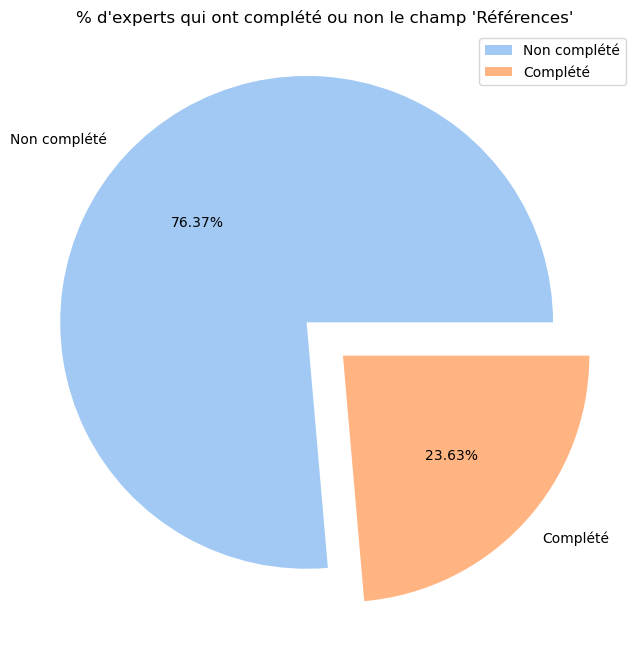

In [58]:
labels = ['Non complété','Complété']

explode = [0.1, 0.1]
colors = sns.color_palette("pastel")
plt.figure(figsize=(8, 8))
plt.pie(ref, autopct='%.2f%%', labels=labels, colors=colors, explode=explode)
plt.title("% d'experts qui ont complété ou non le champ 'Références'")
plt.legend(labels)
plt.show()

In [59]:
liste_ss_ref = CE[CE['name'].isnull()]
liste_ss_ref

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experienceTime,done,temporarilyInvisible,isFake,geo,name,company_name,company_function,phone,mail
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,2023-11-01,2023-12-01,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,NaN,Non renseigné,NaN,NaN,NaN,None,None,None,None,None
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,2023-11-01,2023-12-01,NaN,NaN,NaN,NaN,Bordeaux,...,NaN,Non renseigné,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,2023-10-30,2023-11-30,NaN,NaN,NaN,NaN,NaN,...,NaN,Non renseigné,NaN,NaN,NaN,None,None,None,None,None
5,65687d2711ad9c29f9317dd8,expert,65687d2711ad9c29f9317dd7,2023-10-30,2023-11-30,NaN,NaN,Bac4,Maîtrise de Droit des Affaires,Lyon,...,NaN,Non renseigné,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
6,65684ae76df3a711cd4951e6,expert,65684ae76df3a711cd4951e5,2023-10-30,2023-11-30,Études et conseils,Production,Bac5,Ecole d'ingénieur (ESTP),NaN,...,+ de 25 ans,Non renseigné,NaN,NaN,NaN,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,5ba8fb8b48b26d4df2549705,expert,5ba8fb8b48b26d4df2549704,2018-09-24,2023-10-17,Commerce / Négoce / Distribution,Finance et Comptabilité,Bac5,MBA Sciences Po Paris,france,...,Entre 15 et 25 ans,Oui,0.0,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,2018-09-20,2021-10-27,Services aux entreprises,NaN,NaN,NaN,Bordeaux,...,NaN,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,2018-09-20,2021-10-27,Commerce / Négoce / Distribution,NaN,NaN,NaN,Libourne,...,NaN,Oui,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,2018-09-13,2022-05-12,Commerce / Négoce / Distribution,Direction et Administration,NaN,NaN,Bordeaux,...,20 à 30 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None


# GEO


In [3]:
import json

df2 = pd.DataFrame(CE)

# Fonction pour extraire les coordonnées
def extract_coordinates(geo_data):
    try:
        if pd.notna(geo_data):
            geo_data = json.loads(geo_data.replace("'", "\""))
            coordinates = geo_data["location"]["coordinates"]
            return pd.Series({'LAT': coordinates[1], 'LON': coordinates[0]})
        else:
            return pd.Series({'LAT': None, 'LON': None})
    except (KeyError, json.JSONDecodeError):
        return pd.Series({'LAT': None, 'LON': None})

# Appliquer la fonction pour créer deux nouvelles colonnes 'LAT' et 'LON'
df2[['LAT', 'LON']] = df2['geo'].apply(extract_coordinates)

df2

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo,LAT,LON
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,01/11/2023,1701460182590,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,0.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,01/11/2023,1701448860078,NaN,NaN,NaN,NaN,Bordeaux et périphérie,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",44.837789,-0.579180
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,01/11/2023,1701426872307,Informatique / Télécoms,Informatique et Cybersécurité,Bac5,Ingénieur,Toulouse et périphérie,...,1.0,100.0,1.0,+ de 25 ans,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",43.604652,1.444209
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,30/10/2023,1701439187742,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,"Saint-Étienne, Loire, Lyon, paris,",...,1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",48.856614,2.352222
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,30/10/2023,1701364372080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,20/09/2018,1635344634005,Services aux entreprises,NaN,NaN,NaN,"Bordeaux, France",...,1.0,55.0,NaN,NaN,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",44.837789,-0.579180
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,20/09/2018,1635344634004,Commerce / Négoce / Distribution,NaN,NaN,NaN,"Libourne, France",...,1.0,55.0,NaN,NaN,1.0,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""...",44.912998,-0.243985
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,19/09/2018,1660553442806,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...","Bordeaux, France",...,1.0,100.0,NaN,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",44.837789,-0.579180
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,13/09/2018,1652341680180,Commerce / Négoce / Distribution,Direction et Administration,NaN,NaN,Bordeaux,...,1.0,100.0,NaN,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",44.837789,-0.579180


In [61]:
EVF2 = CE[(CE["visible"] == True) & (CE["percentage"] < 100.0)]
EVF2

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experienceTime,done,temporarilyInvisible,isFake,geo,name,company_name,company_function,phone,mail
219,65002e4c0182db7f4f39feac,expert,65002e4c0182db7f4f39feab,2023-09-12,2023-09-18,Commerce / Négoce / Distribution,Marketing et communication,Bac +5,NaN,Bordeaux,...,Entre 15 et 25 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",A,None,None,None,None
382,647dd4cf0a45f03a65e005c9,expert,647dd4cf0a45f03a65e005c8,2023-06-05,2023-08-28,Informatique / Télécoms,Ressources Humaines,Bac3,Licence Professionnelle GRH,Bordeaux,...,10 à 20 ans,Oui,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
492,64240ef518aa0344da152745,expert,64240ef518aa0344da152744,2023-03-29,2023-12-01,Transports / Logistique,Logistique,Bac5,LOGISTIQUE ET MANAGEMENT INTERNATIONAL - ANALY...,Lyon,...,Entre 15 et 25 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
536,6405af07ad121b1000e28ba7,expert,6405af07ad121b1000e28ba6,2023-03-06,2023-06-03,NaN,NaN,NaN,NaN,NaN,...,NaN,Non renseigné,NaN,1.0,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
626,63d0fd163d805d489fa396cb,expert,63d0fd163d805d489fa396ca,2023-01-25,2023-10-30,Enseignement / Recherche / Formation,Autre,Bac4,Ingénieur Responsable Pédagogique,Bordeaux,...,10 à 20 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",Boutoille Carine Rion Philippe,Evolution professionnelle Quest,Dirigeante Dirigeant,0661303549 0672033947,boutoillecarine@gmail.com pjrion@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,5baa04b748b26d4df2549707,expert,5baa04b748b26d4df2549706,2018-09-25,2021-10-27,Commerce / Négoce / Distribution,NaN,NaN,NaN,Nantes,...,NaN,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
2449,5ba8fb8b48b26d4df2549705,expert,5ba8fb8b48b26d4df2549704,2018-09-24,2023-10-17,Commerce / Négoce / Distribution,Finance et Comptabilité,Bac5,MBA Sciences Po Paris,france,...,Entre 15 et 25 ans,Oui,0.0,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,2018-09-20,2021-10-27,Services aux entreprises,NaN,NaN,NaN,Bordeaux,...,NaN,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,2018-09-20,2021-10-27,Commerce / Négoce / Distribution,NaN,NaN,NaN,Libourne,...,NaN,Oui,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None


In [62]:
EVF2 = CE[(CE["visible"] == True) & (CE["percentage"] < 100.0)]
EVF2

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experienceTime,done,temporarilyInvisible,isFake,geo,name,company_name,company_function,phone,mail
219,65002e4c0182db7f4f39feac,expert,65002e4c0182db7f4f39feab,2023-09-12,2023-09-18,Commerce / Négoce / Distribution,Marketing et communication,Bac +5,NaN,Bordeaux,...,Entre 15 et 25 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",A,None,None,None,None
382,647dd4cf0a45f03a65e005c9,expert,647dd4cf0a45f03a65e005c8,2023-06-05,2023-08-28,Informatique / Télécoms,Ressources Humaines,Bac3,Licence Professionnelle GRH,Bordeaux,...,10 à 20 ans,Oui,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
492,64240ef518aa0344da152745,expert,64240ef518aa0344da152744,2023-03-29,2023-12-01,Transports / Logistique,Logistique,Bac5,LOGISTIQUE ET MANAGEMENT INTERNATIONAL - ANALY...,Lyon,...,Entre 15 et 25 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
536,6405af07ad121b1000e28ba7,expert,6405af07ad121b1000e28ba6,2023-03-06,2023-06-03,NaN,NaN,NaN,NaN,NaN,...,NaN,Non renseigné,NaN,1.0,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
626,63d0fd163d805d489fa396cb,expert,63d0fd163d805d489fa396ca,2023-01-25,2023-10-30,Enseignement / Recherche / Formation,Autre,Bac4,Ingénieur Responsable Pédagogique,Bordeaux,...,10 à 20 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",Boutoille Carine Rion Philippe,Evolution professionnelle Quest,Dirigeante Dirigeant,0661303549 0672033947,boutoillecarine@gmail.com pjrion@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,5baa04b748b26d4df2549707,expert,5baa04b748b26d4df2549706,2018-09-25,2021-10-27,Commerce / Négoce / Distribution,NaN,NaN,NaN,Nantes,...,NaN,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
2449,5ba8fb8b48b26d4df2549705,expert,5ba8fb8b48b26d4df2549704,2018-09-24,2023-10-17,Commerce / Négoce / Distribution,Finance et Comptabilité,Bac5,MBA Sciences Po Paris,france,...,Entre 15 et 25 ans,Oui,0.0,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,2018-09-20,2021-10-27,Services aux entreprises,NaN,NaN,NaN,Bordeaux,...,NaN,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,2018-09-20,2021-10-27,Commerce / Négoce / Distribution,NaN,NaN,NaN,Libourne,...,NaN,Oui,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None


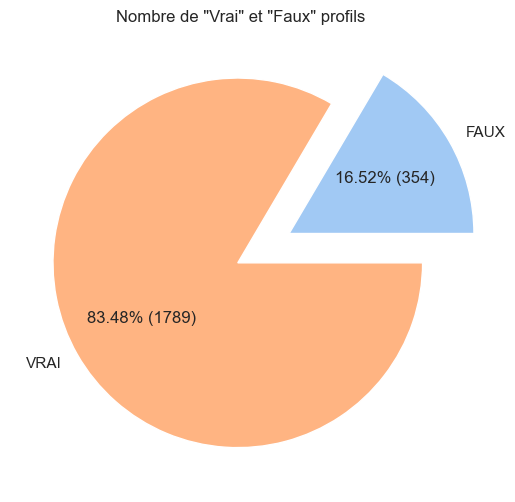

In [63]:
CE_visible = CE.groupby('visible').size()
labels = ["FAUX" , "VRAI"]

explode = [0.3, 0.02]
colors = sns.color_palette("pastel")

sns.set()
CE_visible.plot(kind='pie', labels=labels, colors=colors, title='Nombre de "Vrai" et "Faux" profils',  explode=explode, figsize=[6,6],
          autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*CE_visible.sum()))
plt.show()

In [64]:
CI

,_id,expert_userId,intitule,localisation,date_debut,date_fin,HT_TTC,replacement_or_creation,presentiel_distanciel,isClosed,forfait_remuneration,status,createdAt,updatedAt,hours_planned,note_communication,note_quality,note_level
0,62d80d27f5e6794d89e1dc17,5ba1004a48b26d4df25496f1,coaching,"Bordeaux, France",05/09/2022,01/06/2023,HT,Autre,presentiel,VRAI,NaN,terminated,2022-07-20 00:00:00,1658326691005,4 heures par semaine,NaN,NaN,NaN
1,65095298f95a870ce72f9da5,5ba2276a48b26d4df25496f7,Projet & innovation,Bordeaux,09/03/2023,24/03/2023,TTC,Création de poste,NaN,VRAI,hourly,terminated,2023-09-19 00:00:00,1695109850492,18,NaN,NaN,NaN
2,623c45418135b2295c13ff57,5bf593dd8837de33a00d28ba,Formateur en contrôle de gestion,"Bordeaux, France",28/03/2022,29/03/2022,TTC,Remplacement,presentiel,NaN,NaN,pending,2022-03-24 00:00:00,1648219017665,6,NaN,NaN,NaN
3,650b02ff8b2725390d967cb7,5c4ad60cc4c39323bc6a57ae,Produits alimentaires de luxe,Bordeaux,11/09/2023,31/07/2024,TTC,création,NaN,FAUX,hourly,pending,2023-09-20 00:00:00,1695220482418,10.5,NaN,NaN,NaN
4,650b02b18b2725390d967cb1,5c4ad60cc4c39323bc6a57ae,Agriculture et environnement durable,Bordeaux,11/09/2023,31/07/2024,TTC,création,NaN,FAUX,hourly,pending,2023-09-20 00:00:00,1695220405461,10.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,65688f4e11ad9c29f9317df9,6525700e5b0ddd07d925b6c1,Jury marketing,Bordeaux,30/11/2023,30/11/2023,NaN,Création,presentiel,VRAI,hourly,terminated,2023-10-30 00:00:00,1701690128131,3,NaN,NaN,NaN
575,6560a72b4054c942bf3e920d,65296f575b0ddd07d925c0b4,Le transport routier de marchandises,Bourges (Centre-Val de Loire 18000),27/09/2023,27/09/2023,HT,Création,presentiel,FAUX,hourly,pending,2023-10-24 00:00:00,1700833072305,16,NaN,NaN,NaN
576,65547ea4203e6a22c9eefd3e,6532a1235b0ddd07d925d209,Data Marketing,Bordeaux,22/12/2023,23/01/2024,TTC,Création,NaN,FAUX,hourly,pending,2023-10-15 00:00:00,1700036266770,14,NaN,NaN,NaN
577,6549dfac72811d2ae603d1a6,65490e1f72811d2ae603cfd2,UI Design,Villeurbanne,14/11/2023,20/11/2023,TTC,Création,NaN,VRAI,daily,terminated,2023-10-07 00:00:00,1700758838677,"7,5h/j, sur 10 jours, sur 2 semaines",NaN,NaN,NaN


In [65]:
CI["replacement_or_creation"].value_counts()

replacement_or_creation
Création                                                                                   195
Création de poste                                                                          193
création                                                                                    26
RECONDUCTION                                                                                26
reconduction                                                                                24
Autre                                                                                       21
Remplacement                                                                                19
Créa                                                                                        13
créa                                                                                        12
remplacement                                                                                 7
création de poste         

In [66]:
CI["replacement_or_creation"] = CI["replacement_or_creation"].replace(["Création de poste"], "Création")

In [67]:
CI["replacement_or_creation"] = CI["replacement_or_creation"].replace(["Création "], "Création")

In [68]:
CI["replacement_or_creation"] = CI["replacement_or_creation"].replace(["RECONDUCTION", "reconduction", "reconduction +", "rreconduction" ], "Reconduction")

In [69]:
CI["replacement_or_creation"] = CI["replacement_or_creation"].replace(["remplacement", "REMPLACEMENT", "Remplacement d'un intervenant qui ne pourra pas continuer les cours après le 17 juillet" ], "Remplacement")

In [70]:
CI["localisation"].value_counts()

localisation
Bordeaux                                 374
Lyon                                      41
Bordeaux, France                          28
Nantes                                    21
Toulouse                                  17
Lille                                     11
Mérignac                                   8
Angoulême                                  7
Angouleme                                  7
Nantes, France                             5
Rennes, France                             5
Le Mans                                    4
Lille, France                              4
bordeaux                                   4
Paris                                      3
Mérignac, France                           3
Lyon, France                               3
Montpellier                                3
Rennes                                     3
Décines-Charpieu, France                   2
58 Rue de Marseille, Bordeaux, France      2
BORDEAUX                                  

In [71]:
result = CI.pivot_table(index='note_level', values='_id', aggfunc='count')
result

,_id
note_level,
4.0,1
5.0,10


In [72]:
nbre_int = CI['expert_userId'].value_counts()
nbre_int 

expert_userId
62d28ea2c43a1c07852b7659    21
5df161ae89e8665746150467    15
62436c8cc60bd00898a38710    12
640eded4ad121b1000e29937    11
62553ef6a6a5e0544be60948    11
                            ..
626c0fa492c2ec2a7d2676ef     1
62714fa492c2ec2a7d267a4a     1
62876ea38cd3654f46459afd     1
628deae31fbb047964271927     1
655cc8830972f25b9dfca77c     1
Name: count, Length: 239, dtype: int64

In [73]:
merged_df = pd.merge(CI, CE, left_on='expert_userId', right_on='userId', how='inner')
merged_df

,_id_x,expert_userId,intitule,localisation,date_debut,date_fin,HT_TTC,replacement_or_creation,presentiel_distanciel,isClosed,...,experienceTime,done,temporarilyInvisible,isFake,geo,name,company_name,company_function,phone,mail
0,62d80d27f5e6794d89e1dc17,5ba1004a48b26d4df25496f1,coaching,"Bordeaux, France",05/09/2022,01/06/2023,HT,Autre,presentiel,VRAI,...,Entre 10 et 15 ans,Oui,0.0,0.0,"{""localized"":true,""localizationSuccess"":true,""...",Jeremy Cuesta Oger,Akigora,dév,06 37 74 50 58,jeremy@akigora.com
1,65095298f95a870ce72f9da5,5ba2276a48b26d4df25496f7,Projet & innovation,Bordeaux,09/03/2023,24/03/2023,TTC,Création,NaN,VRAI,...,+ de 30 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",Anne Boisseau,GEMA,Directrice Campus de Bordeaux,\t 05 64 37 26 40,anne.boisseau@groupe-gema.com
2,623c45418135b2295c13ff57,5bf593dd8837de33a00d28ba,Formateur en contrôle de gestion,"Bordeaux, France",28/03/2022,29/03/2022,TTC,Remplacement,presentiel,NaN,...,NaN,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
3,650b02ff8b2725390d967cb7,5c4ad60cc4c39323bc6a57ae,Produits alimentaires de luxe,Bordeaux,11/09/2023,31/07/2024,TTC,création,NaN,FAUX,...,20 à 30 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
4,650b02b18b2725390d967cb1,5c4ad60cc4c39323bc6a57ae,Agriculture et environnement durable,Bordeaux,11/09/2023,31/07/2024,TTC,création,NaN,FAUX,...,20 à 30 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,65688f4e11ad9c29f9317df9,6525700e5b0ddd07d925b6c1,Jury marketing,Bordeaux,30/11/2023,30/11/2023,NaN,Création,presentiel,VRAI,...,Entre 15 et 25 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...","JOSKI, OLIVIA MOREAU, EGLANTINE",MEN ON MARS SOUTH POLE,CEO MARKETING DIRECTOR EUROPE,0665564948 0631962755,None
575,6560a72b4054c942bf3e920d,65296f575b0ddd07d925c0b4,Le transport routier de marchandises,Bourges (Centre-Val de Loire 18000),27/09/2023,27/09/2023,HT,Création,presentiel,FAUX,...,+ de 25 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",Frédéric Carion,OCP Phoenix Repartition,Responsable Transports Expéditions,+33665768135,frederic.carion@sfr.fr
576,65547ea4203e6a22c9eefd3e,6532a1235b0ddd07d925d209,Data Marketing,Bordeaux,22/12/2023,23/01/2024,TTC,Création,NaN,FAUX,...,Entre 5 et 10 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...","Roy-Contancin, Bruno Le Pape, Hélène",AT Internet AT Internet,VP Consulting and Support Head of HR,None,None
577,6549dfac72811d2ae603d1a6,65490e1f72811d2ae603cfd2,UI Design,Villeurbanne,14/11/2023,20/11/2023,TTC,Création,NaN,VRAI,...,Entre 5 et 10 ans,Oui,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",None,None,None,None,None


In [74]:
nbre_int = merged_df.pivot_table(index='name', values="expert_userId", aggfunc='count')
nbre_int_sorted = nbre_int.sort_values(by="expert_userId", ascending=False)
nbre_int_sorted

,expert_userId
name,
Fabrice Farge,21
Frédéric PETOT Anthony LE DUIGOU,11
mathias ruiz,10
Nathan Marimbordes Maïlys Maury,10
Pascal PROVO Frédéric LARRIVE,9
...,...
Michael Lippert Pauline Plisson,1
Mr Aziz LAMQUADMI Adeline Crétin,1
Clarisse BRET Agnès SAEZ,1


In [92]:
def remplacer(df, colonne, valeur_a_remplacer, par):
    df[colonne] = df[colonne].replace(valeur_a_remplacer, par)
    return df

CI = remplacer(CI, 'hours_planned', ["35 Heures"], 35)
CI = remplacer(CI, 'hours_planned', ["18 Heures"], 18)
CI = remplacer(CI, 'hours_planned', ["46 Heures"], 46)
CI = remplacer(CI, 'hours_planned', ["7h"], 7)
CI = remplacer(CI, 'hours_planned', ["30h par semaine pendant 3 semaines"], 90)
CI = remplacer(CI, 'hours_planned', ["10h"], 10)
CI = remplacer(CI, 'hours_planned', ["30h réparties sur 2 semaines"], 30)
CI = remplacer(CI, 'hours_planned', ["14 Heures"], 14)
CI = remplacer(CI, 'hours_planned', ["112h sur l'année (environ 4h/semaine)"], 112)
CI = remplacer(CI, 'hours_planned', ["8 Heures"], 8)
CI = remplacer(CI, 'hours_planned', ["15h ( créneau de 1h30 séparé de 15 min)"], 15)
CI = remplacer(CI, 'hours_planned', ["18 heures x2 classes"], 36)
CI = remplacer(CI, 'hours_planned', ["28h réparties comme suit : 7/10 PM 21/11 PM 12/12 PM 15/12 PM 10/01 AM 12/01 PM 1/02 AM 3/02 AM"], 28)
CI = remplacer(CI, 'hours_planned', ["23 Heures"], 23)
CI = remplacer(CI, 'hours_planned', ["Module de 30h réparties comme suit : 10/10 PM 3h 10/01 PM 3.5h 11/01 Day 7h 14/03 AM 3h 04/04 PM 3h 05/04 Day 7h 07/04 AM 3.5h"], 30)
CI = remplacer(CI, 'hours_planned', ["14h"], 14)
CI = remplacer(CI, 'hours_planned', ["68h annuelle"], 68)
CI = remplacer(CI, 'hours_planned', ["17h30"], 17.5)
CI = remplacer(CI, 'hours_planned', ["24h30"], 24.5)
CI = remplacer(CI, 'hours_planned', ["3 Heures"], 3)
CI = remplacer(CI, 'hours_planned', ["24,5 Heures"], 24.5)
CI = remplacer(CI, 'hours_planned', ["14 heures"], 14)
CI = remplacer(CI, 'hours_planned', ["4 (8h30-12h30)"], 4)
CI = remplacer(CI, 'hours_planned', ["18h"], 18)
CI = remplacer(CI, 'hours_planned', ["18 heures x 2 classes"], 36)
CI = remplacer(CI, 'hours_planned', ["60h sur l'année"], 60)
CI = remplacer(CI, 'hours_planned', ["70 Heures"], 70)
CI = remplacer(CI, 'hours_planned', ["21 Heures"], 21)
CI = remplacer(CI, 'hours_planned', ["28 Heures"], 28)
CI = remplacer(CI, 'hours_planned', ["60 Heures"], 60)
CI = remplacer(CI, 'hours_planned', ["30h"], 30)
CI = remplacer(CI, 'hours_planned', ["18 heures"], 18)
CI = remplacer(CI, 'hours_planned', ["7,5h/j, sur 10 jours, sur 2 semaines"], 75)
CI = remplacer(CI, 'hours_planned', ["ezfefz"], np.nan)
CI = remplacer(CI, 'hours_planned', ["7 Heures/Jour","4 heures par semaine","40 Heures/Groupe"], np.nan)


In [93]:
CI['hours_planned'] = pd.to_numeric(CI['hours_planned'], errors='coerce')

In [94]:
CI['hours_planned'].unique()

array([  nan,  18. ,   6. ,  10.5,   4. ,  14. ,  21. ,  30. ,  56. ,
        28. ,  17.5,   7. ,  35. ,  12. ,  36. ,  54. ,  24.5,   6.5,
        40. ,  45.5,  20. ,  46. ,  16. ,  90. ,  10. ,  24. ,  73.5,
        68. ,   8. ,  23. ,   2. ,  87.5,  91. ,  63. ,  45. ,  15. ,
        42. ,   3. ,  70. ,  58. ,  48. , 480. ,  49. ,  22. ,  72. ,
         5. ,  96. , 112. ,   9. ,  26. ,   1. ,  60. ,   3.5, 288. ,
        50. ,  80. ,  38.5,  25.5,  31.5, 140. ,  59.5, 196. , 120. ,
        32.5,  31. , 280. ,  27. ,  25. ,  11. ,  32. ,  84. ,  75. ])

In [95]:
CI['hours_planned'].sum()

14711.5

In [96]:
CI.dropna(subset=['hours_planned'])

,_id,expert_userId,intitule,localisation,date_debut,date_fin,HT_TTC,replacement_or_creation,presentiel_distanciel,isClosed,forfait_remuneration,status,createdAt,updatedAt,hours_planned,note_communication,note_quality,note_level
1,65095298f95a870ce72f9da5,5ba2276a48b26d4df25496f7,Projet & innovation,Bordeaux,09/03/2023,24/03/2023,TTC,Création,NaN,VRAI,hourly,terminated,2023-09-19 00:00:00,1695109850492,18.0,NaN,NaN,NaN
2,623c45418135b2295c13ff57,5bf593dd8837de33a00d28ba,Formateur en contrôle de gestion,"Bordeaux, France",28/03/2022,29/03/2022,TTC,Remplacement,presentiel,NaN,NaN,pending,2022-03-24 00:00:00,1648219017665,6.0,NaN,NaN,NaN
3,650b02ff8b2725390d967cb7,5c4ad60cc4c39323bc6a57ae,Produits alimentaires de luxe,Bordeaux,11/09/2023,31/07/2024,TTC,création,NaN,FAUX,hourly,pending,2023-09-20 00:00:00,1695220482418,10.5,NaN,NaN,NaN
4,650b02b18b2725390d967cb1,5c4ad60cc4c39323bc6a57ae,Agriculture et environnement durable,Bordeaux,11/09/2023,31/07/2024,TTC,création,NaN,FAUX,hourly,pending,2023-09-20 00:00:00,1695220405461,10.5,NaN,NaN,NaN
5,650b027b8b2725390d967ca8,5c4ad60cc4c39323bc6a57ae,Filière alimentaires et leurs organisations,Bordeaux,11/09/2023,31/07/2024,TTC,création,NaN,FAUX,hourly,pending,2023-09-20 00:00:00,1695220350730,10.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,65688f4e11ad9c29f9317df9,6525700e5b0ddd07d925b6c1,Jury marketing,Bordeaux,30/11/2023,30/11/2023,NaN,Création,presentiel,VRAI,hourly,terminated,2023-10-30 00:00:00,1701690128131,3.0,NaN,NaN,NaN
575,6560a72b4054c942bf3e920d,65296f575b0ddd07d925c0b4,Le transport routier de marchandises,Bourges (Centre-Val de Loire 18000),27/09/2023,27/09/2023,HT,Création,presentiel,FAUX,hourly,pending,2023-10-24 00:00:00,1700833072305,16.0,NaN,NaN,NaN
576,65547ea4203e6a22c9eefd3e,6532a1235b0ddd07d925d209,Data Marketing,Bordeaux,22/12/2023,23/01/2024,TTC,Création,NaN,FAUX,hourly,pending,2023-10-15 00:00:00,1700036266770,14.0,NaN,NaN,NaN
577,6549dfac72811d2ae603d1a6,65490e1f72811d2ae603cfd2,UI Design,Villeurbanne,14/11/2023,20/11/2023,TTC,Création,NaN,VRAI,daily,terminated,2023-10-07 00:00:00,1700758838677,75.0,NaN,NaN,NaN


In [97]:
CI['hours_planned'].mean()

27.043198529411764

In [197]:
taux_sup_10 = CE[(CE['daily_hourly_prices.daily_price_min'] >= 10) & (CE['daily_hourly_prices.daily_price_min'] < 10000)]
taux_min = taux_sup_10['daily_hourly_prices.daily_price_min'].min()
taux_min

15.0

In [198]:
taux_inf_10000 = CE[(CE['daily_hourly_prices.daily_price_max'] >= 10) & (CE['daily_hourly_prices.daily_price_max'] <= 10000)]
taux_max = taux_inf_10000['daily_hourly_prices.daily_price_max'].max()
taux_max

7200.0

In [199]:
taux_sup_10_mean = round(taux_sup_10['daily_hourly_prices.daily_price_min'].mean(), 2)
taux_sup_10_mean

514.75

In [200]:
taux_inf_10000_mean = round(taux_inf_10000['daily_hourly_prices.daily_price_max'].mean(), 2)
taux_inf_10000_mean

1107.15

In [201]:
moyenne_total = round((taux_sup_10_mean + taux_inf_10000_mean) / 2, 2)
moyenne_total

810.95

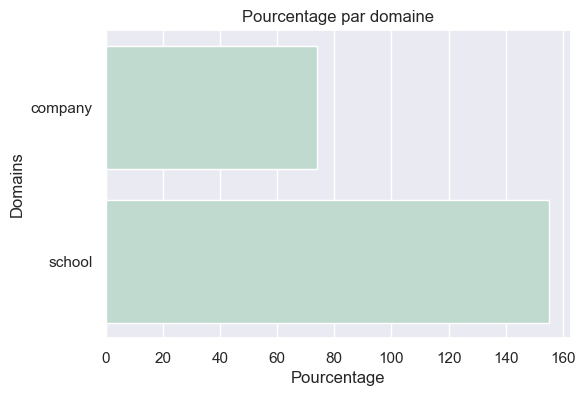

In [211]:
plt.figure(figsize=(6, 4))
sns.barplot(x='_id', y='companyOrSchool', data=companyOrSchool, color="#bcded0", orient='h')

plt.ylabel('Domains')
plt.xlabel('Pourcentage')
plt.title('Pourcentage par domaine')
plt.show()

In [231]:
CU.dropna(subset=['companyOrSchool'])

,_id,civility,howWeMet,mailing,sms,createdAt,updatedAt,cgu_accepted.cgu_last_version_accepted,cgu_accepted.accepted_when,validatedEmail,companyOrSchool,lastConnection,company.type,company.tvaNumber,email
2,656c999b843c536c576b92b7,female,bouche à oreille,VRAI,FAUX,2023-11-03 00:00:00,1.701617e+12,VRAI,1.701616e+12,VRAI,company,1.701617e+12,ENCOURS,20.0,NaN
10,65679f206df3a711cd495148,female,bouche à oreille,VRAI,FAUX,2023-10-29 00:00:00,1.701290e+12,VRAI,1.701290e+12,VRAI,company,NaN,SARL,20.0,NaN
13,65675f556df3a711cd4950df,female,bouche à oreille,FAUX,FAUX,2023-10-29 00:00:00,1.701354e+12,VRAI,1.701273e+12,VRAI,school,1.701354e+12,SAS,0.0,NaN
14,6567044c6df3a711cd495028,female,linkedin,FAUX,FAUX,2023-10-29 00:00:00,1.701250e+12,VRAI,1.701250e+12,NaN,school,NaN,NaN,NaN,NaN
16,6565ad256df3a711cd494dcd,female,linkedin,FAUX,FAUX,2023-10-28 00:00:00,1.701162e+12,VRAI,1.701162e+12,VRAI,school,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,626bf65e92c2ec2a7d2676cd,male,bouche à oreille,VRAI,FAUX,2022-04-29 00:00:00,1.657553e+12,VRAI,1.651243e+12,VRAI,company,1.657553e+12,NaN,NaN,NaN
1346,626808c6e78e047aff451415,female,bouche à oreille,FAUX,FAUX,2022-04-26 00:00:00,1.653396e+12,VRAI,1.650985e+12,VRAI,company,NaN,SAS,NaN,NaN
2763,628ca9f88cd3654f4645a03a,NaN,autre,False,False,1653385720151,NaN,NaN,NaN,True,school,NaN,NaN,NaN,removed@akigora.com
2771,6303528647b68d445cd21238,NaN,bouche à oreille,True,False,1661162118279,NaN,NaN,NaN,True,school,1.669369e+12,NaN,NaN,removed@akigora.com


In [232]:
companyOrSchool = CU['companyOrSchool'].value_counts()
companyOrSchool

companyOrSchool
school     155
company     74
Name: count, dtype: int64

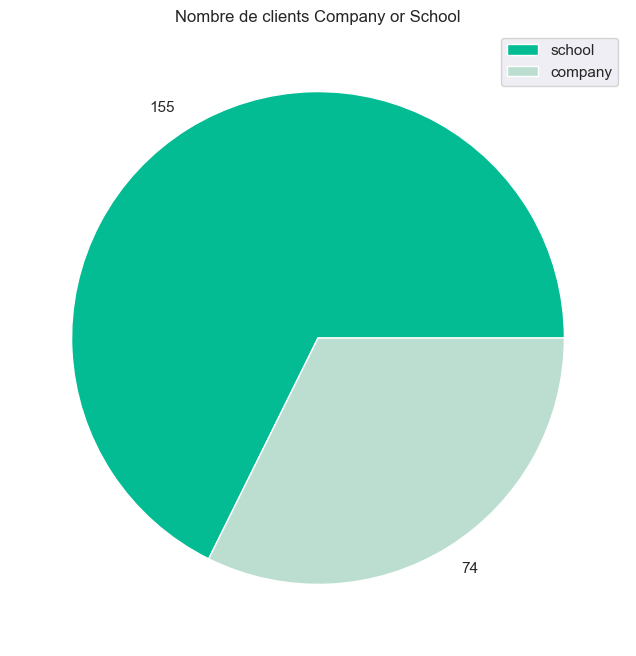

In [241]:
labels = companyOrSchool
colors = sns.color_palette(["#03bc93", "#bcded0"])
plt.figure(figsize=(8, 8))
plt.pie(companyOrSchool, labels=companyOrSchool, colors=colors)
plt.title("Nombre de clients Company or School")
plt.legend(companyOrSchool.index)
plt.show()

In [11]:
companyType = CU.dropna(subset=['company.type'])
companyType 

,_id,civility,howWeMet,mailing,sms,createdAt,updatedAt,cgu_accepted.cgu_last_version_accepted,cgu_accepted.accepted_when,validatedEmail,companyOrSchool,lastConnection,company.type,company.tvaNumber,email
2,656c999b843c536c576b92b7,female,bouche à oreille,VRAI,FAUX,2023-11-03 00:00:00,1.701617e+12,VRAI,1.701616e+12,VRAI,company,1.701617e+12,ENCOURS,20.0,NaN
10,65679f206df3a711cd495148,female,bouche à oreille,VRAI,FAUX,2023-10-29 00:00:00,1.701290e+12,VRAI,1.701290e+12,VRAI,company,NaN,SARL,20.0,NaN
13,65675f556df3a711cd4950df,female,bouche à oreille,FAUX,FAUX,2023-10-29 00:00:00,1.701354e+12,VRAI,1.701273e+12,VRAI,school,1.701354e+12,SAS,0.0,NaN
18,6564ba586df3a711cd494c42,male,linkedin,FAUX,FAUX,2023-10-27 00:00:00,1.701330e+12,VRAI,1.701100e+12,VRAI,company,1.701330e+12,SARL,0.0,NaN
19,6564b5f46df3a711cd494c2e,male,bouche à oreille,FAUX,FAUX,2023-10-27 00:00:00,1.701681e+12,VRAI,1.701099e+12,VRAI,company,1.701681e+12,SARL,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,5ba3acee48b26d4df2549701,female,bouche à oreille,NaN,NaN,2018-09-20 00:00:00,1.653396e+12,NaN,NaN,VRAI,NaN,1.571825e+12,MICRO,NaN,NaN
2729,5ba1004a48b26d4df25496f1,male,bouche à oreille,VRAI,VRAI,2018-09-18 00:00:00,1.701683e+12,VRAI,1.625479e+12,VRAI,NaN,1.701683e+12,SASU,20.0,NaN
2730,5b9a70668b91483739a2efec,male,bouche à oreille,NaN,NaN,2018-09-13 00:00:00,1.653396e+12,NaN,NaN,VRAI,NaN,1.587547e+12,MICRO,NaN,NaN
2732,5ba2276a48b26d4df25496f7,female,NaN,VRAI,VRAI,NaN,1.681972e+12,VRAI,1.627127e+12,VRAI,NaN,1.681972e+12,MICRO,NaN,NaN


In [24]:
table_companyType = companyType.pivot_table(index=['company.type','civility'], values='_id', aggfunc='count').reset_index()
table_companyType['pct.company.type'] = round((table_companyType['_id'] / table_companyType['_id'].sum()) * 100, 2)
table_companyType = table_companyType.sort_values(by='pct.company.type', ascending=False)
table_companyType

,company.type,civility,_id,pct.company.type
13,MICRO,male,194,20.21
12,MICRO,female,152,15.83
21,SAS,male,108,11.25
23,SASU,male,78,8.12
20,SAS,female,78,8.12
19,SARL,male,62,6.46
22,SASU,female,43,4.48
18,SARL,female,38,3.96
0,ASSO,female,38,3.96
3,EI,male,28,2.92


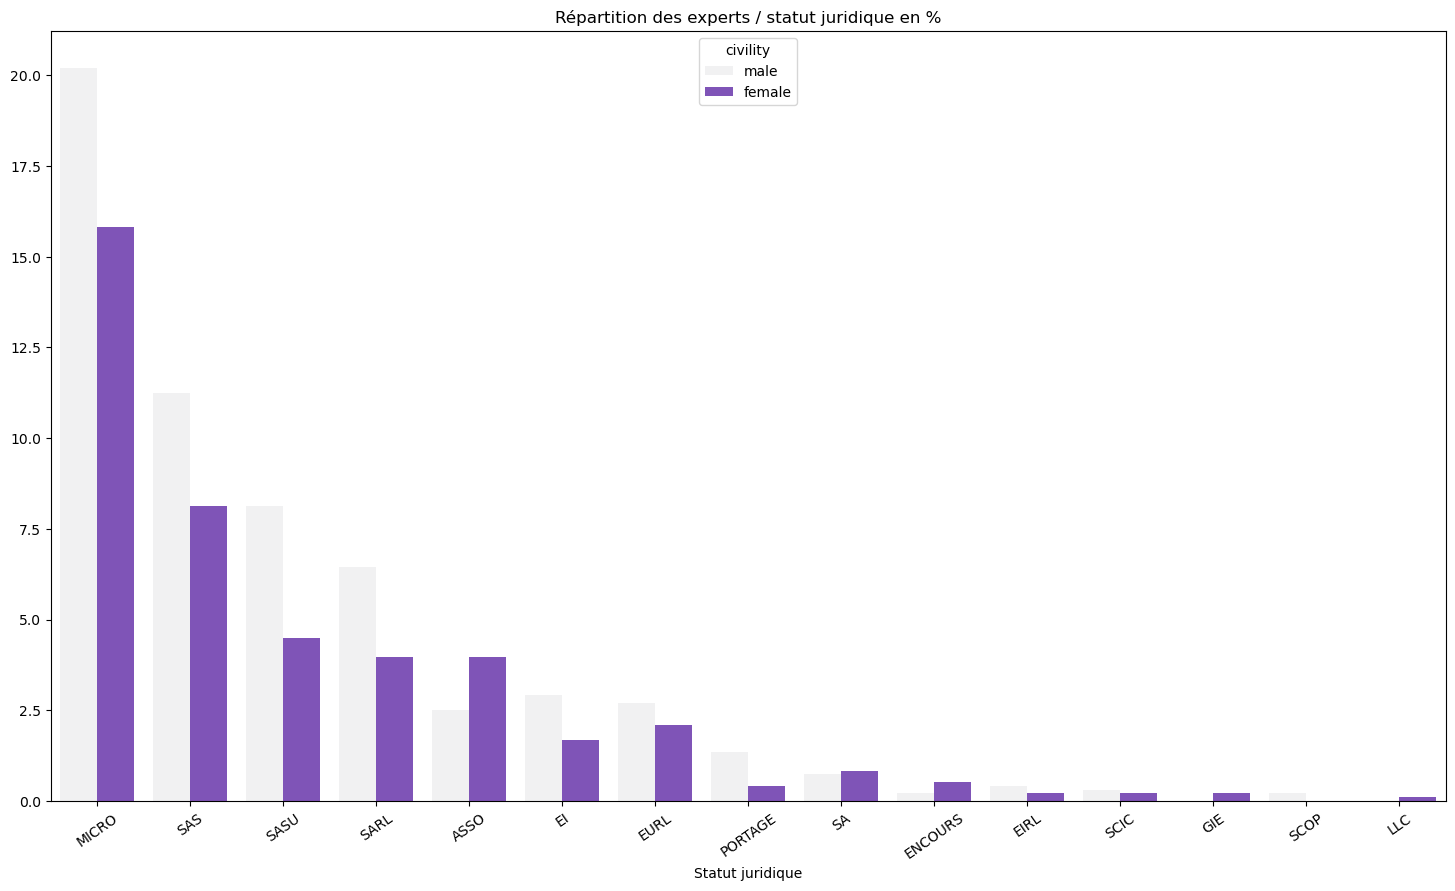

In [20]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='company.type', hue='civility', y='pct.company.type', data=table_companyType, color='#7d43c8')
plt.title("Répartition des experts / statut juridique en %")
plt.xlabel("Statut juridique")
plt.ylabel("")
plt.xticks(rotation=35)



plt.show()

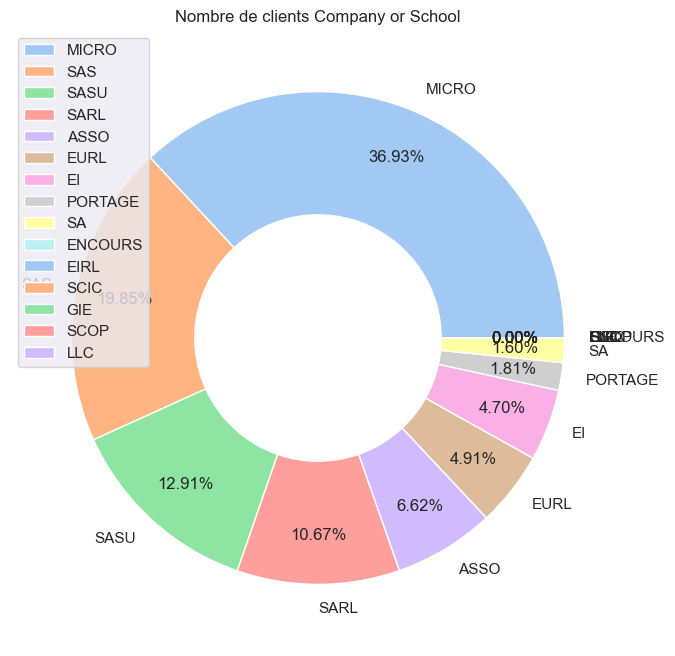

In [300]:
# Identifier les catégories qui représentent moins de 1%
threshold = 1
mask = (companyType / companyType.sum() * 100) >= threshold

companyType_grouped = companyType.copy()
companyType_grouped[~mask] = 0

labels = companyType_grouped 
colors = sns.color_palette("pastel")
plt.figure(figsize=(8, 8))
plt.pie(companyType_grouped , labels=companyType_grouped.index, colors=colors, autopct='%.2f%%', pctdistance=0.8, wedgeprops=dict(width=0.5))
plt.title("Nombre de clients Company or School")
plt.legend()
plt.show()

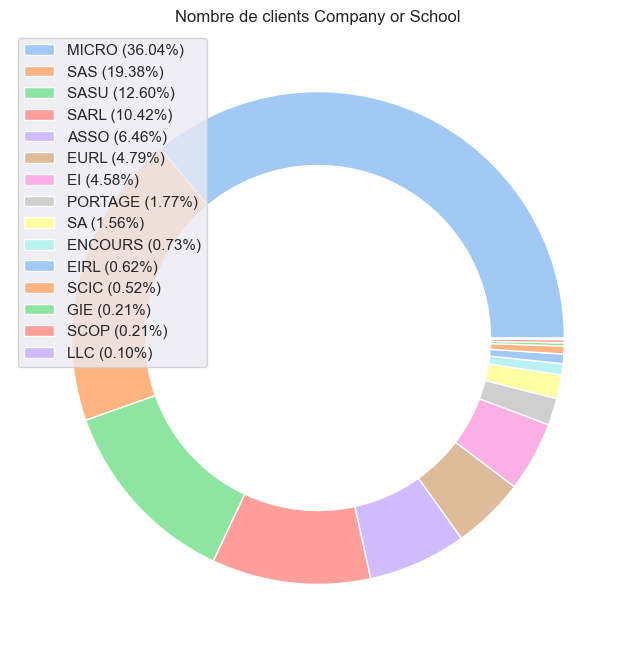

In [272]:
plt.figure(figsize=(8, 8))
plt.pie(companyType, colors=colors, autopct='',  wedgeprops=dict(width=0.3))
plt.title("Nombre de clients Company or School")
plt.legend(labels=[f'{label} ({percent:.2f}%)' for label, percent in zip(companyType.index, (companyType / companyType.sum()) * 100)])
plt.show()

In [420]:
CE['experienceTime'].value_counts()

experienceTime
10 à 20 ans           679
20 à 30 ans           457
+ de 30 ans           193
Entre 15 et 25 ans    149
+ de 25 ans           132
moins de 10 ans       127
Entre 10 et 15 ans     98
Entre 5 et 10 ans      90
Name: count, dtype: int64

In [413]:
CE = remplacer(CE, 'experienceTime', ["mois de 10 ans"], ['moins de 10 ans'])

In [415]:
CE['experienceTimeOne'] = np.where(
    (CE['experienceTime'] == '10 à 20 ans') 
    | (CE['experienceTime'] == '20 à 30 ans') 
    | (CE['experienceTime'] == '+ de 30 ans') 
    | (CE['experienceTime'] == 'moins de 10 ans'),
    CE['experienceTime'], np.nan)

# Afficher le DataFrame avec la nouvelle colonne
CE

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo,experienceTimeOne
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,01/11/2023,1701460182590,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,"[{""name"":"""",""company_name"":"""",""company_functio...",0.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,01/11/2023,1701448860078,NaN,NaN,NaN,NaN,Bordeaux et périphérie,...,"[{""name"":"""",""company_name"":"""",""company_functio...",0.0,0.0,1.0,NaN,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,01/11/2023,1701426872307,Informatique / Télécoms,Informatique et Cybersécurité,Bac5,Ingénieur,Toulouse et périphérie,...,"[{""name"":""Gardeur, Sylvain"",""company_name"":""Ai...",1.0,100.0,1.0,+ de 25 ans,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,30/10/2023,1701439187742,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,"Saint-Étienne, Loire, Lyon, paris,",...,"[{""name"":""Verrier Béatrice"",""company_name"":""IC...",1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,30/10/2023,1701364372080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,20/09/2018,1635344634005,Services aux entreprises,NaN,NaN,NaN,"Bordeaux, France",...,NaN,1.0,55.0,NaN,NaN,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,20/09/2018,1635344634004,Commerce / Négoce / Distribution,NaN,NaN,NaN,"Libourne, France",...,NaN,1.0,55.0,NaN,NaN,1.0,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,19/09/2018,1660553442806,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...","Bordeaux, France",...,"[{""name"":""Anne Boisseau"",""company_name"":""GEMA""...",1.0,100.0,NaN,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",+ de 30 ans
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,13/09/2018,1652341680180,Commerce / Négoce / Distribution,Direction et Administration,NaN,NaN,Bordeaux,...,NaN,1.0,100.0,NaN,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",20 à 30 ans


In [416]:
experienceTimeOne = CE.dropna(subset=['experienceTimeOne'])
experienceTimeOne

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo,experienceTimeOne
255,64e4ec8239328140f591ed5d,expert,64e4ec8239328140f591ed5c,22/08/2023,1692868847493,Enseignement / Recherche / Formation,Direction et Administration,Bac5,Sciences-po Bordeaux,"Bordeaux, Nouvelle-Aquitaine, France",...,"[{""name"":"""",""company_name"":"""",""company_functio...",1.0,100.0,1.0,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",20 à 30 ans
324,64a9b5ec0c73164841e4c98d,expert,64a9b5ec0c73164841e4c98c,08/07/2023,1698925561553,Informatique / Télécoms,Informatique et Cybersécurité,Bac3,Licence Professionnelle Création Multimédia,"Bordeaux, France",...,[],1.0,100.0,NaN,moins de 10 ans,NaN,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""...",moins de 10 ans
325,64a98ac10c73164841e4c948,expert,64a98ac10c73164841e4c947,08/07/2023,1689150780141,Commerce / Négoce / Distribution,Marketing et communication,Bac5,Master 2 business developer,"Bordeaux, France",...,"[{""name"":""sophie texier"",""company_name"":""barto...",1.0,100.0,NaN,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",20 à 30 ans
326,64a7f83b0c73164841e4c5ed,expert,64a7f83b0c73164841e4c5ec,07/07/2023,1696942740121,Santé / Social / Sport et loisirs,Direction et Administration,Bac2,Management de Secrétaires médicales,"Bordeaux, France",...,"[{""name"":""CARTIER Aurélien"",""company_name"":""AH...",1.0,100.0,NaN,10 à 20 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",10 à 20 ans
327,64a7f6080c73164841e4c5e9,expert,64a7f6080c73164841e4c5e8,07/07/2023,1689067860121,Commerce / Négoce / Distribution,Ressources Humaines,Bac5,Master 2 Droit social,"Bordeaux, France",...,"[{""name"":""Lydie Milenkovic"",""company_name"":""So...",1.0,100.0,NaN,10 à 20 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",10 à 20 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,5bc4a282f1543204a60cb0bd,expert,5bc4a282f1543204a60cb0bc,15/010/2018,1661155140167,Enseignement / Recherche / Formation,Commerce,NaN,NaN,"Bordeaux, France",...,NaN,1.0,100.0,NaN,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",20 à 30 ans
2441,5bb3d0a748b26d4df2549729,expert,5bb3d0a748b26d4df2549728,02/010/2018,1652343780230,Études et conseils,Ressources Humaines,NaN,NaN,"Châlons-en-Champagne, France",...,NaN,1.0,100.0,NaN,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",20 à 30 ans
2443,5bab904248b26d4df2549717,expert,5bab904248b26d4df2549716,26/09/2018,1652343000135,Commerce / Négoce / Distribution,Commerce,NaN,NaN,"Paris, France",...,NaN,1.0,100.0,NaN,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",+ de 30 ans
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,19/09/2018,1660553442806,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...","Bordeaux, France",...,"[{""name"":""Anne Boisseau"",""company_name"":""GEMA""...",1.0,100.0,NaN,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",+ de 30 ans


In [469]:
ordered_categoriesEto = ['moins de 10 ans', '10 à 20 ans', '20 à 30 ans', '+ de 30 ans']

In [472]:
count_eto = experienceTimeOne['experienceTimeOne'].value_counts()
count_eto = count_eto.reindex(ordered_categoriesEto)

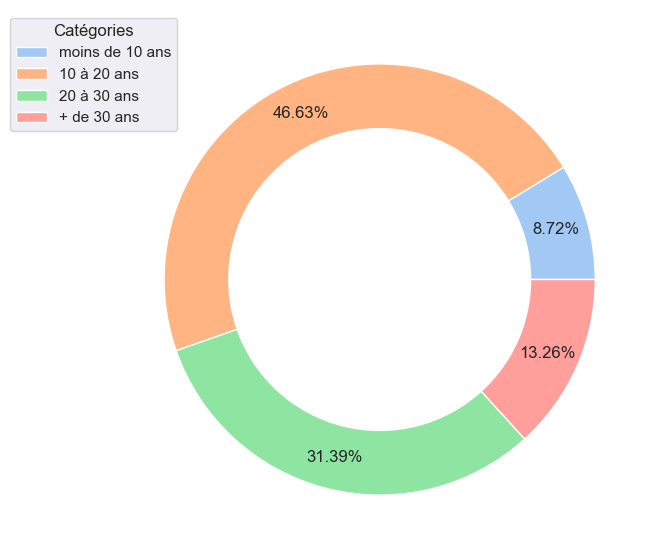

In [508]:
labels = count_eto
colors = sns.color_palette("pastel")
plt.figure(figsize=(7, 7))
plt.pie(count_eto, autopct='%.2f%%', colors=colors, wedgeprops=dict(width=0.3), pctdistance=0.85)
plt.legend(labels.index,  loc="upper left", title="Catégories", bbox_to_anchor=(-0.2, 1))
plt.show()

In [425]:
CE['experienceTimeSecond'] = np.where(
    (CE['experienceTime'] == 'Entre 5 et 10 ans') 
    | (CE['experienceTime'] == 'Entre 10 et 15 ans') 
    | (CE['experienceTime'] == 'Entre 15 et 25 ans') 
    | (CE['experienceTime'] == '+ de 25 ans'),
    CE['experienceTime'], np.nan)
CE

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo,experienceTimeOne,experienceTimeSecond
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,01/11/2023,1701460182590,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,0.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,01/11/2023,1701448860078,NaN,NaN,NaN,NaN,Bordeaux et périphérie,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN,NaN
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,01/11/2023,1701426872307,Informatique / Télécoms,Informatique et Cybersécurité,Bac5,Ingénieur,Toulouse et périphérie,...,1.0,100.0,1.0,+ de 25 ans,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN,+ de 25 ans
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,30/10/2023,1701439187742,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,"Saint-Étienne, Loire, Lyon, paris,",...,1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN,+ de 25 ans
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,30/10/2023,1701364372080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,20/09/2018,1635344634005,Services aux entreprises,NaN,NaN,NaN,"Bordeaux, France",...,1.0,55.0,NaN,NaN,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN,NaN
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,20/09/2018,1635344634004,Commerce / Négoce / Distribution,NaN,NaN,NaN,"Libourne, France",...,1.0,55.0,NaN,NaN,1.0,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN,NaN
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,19/09/2018,1660553442806,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...","Bordeaux, France",...,1.0,100.0,NaN,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",+ de 30 ans,NaN
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,13/09/2018,1652341680180,Commerce / Négoce / Distribution,Direction et Administration,NaN,NaN,Bordeaux,...,1.0,100.0,NaN,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",20 à 30 ans,NaN


In [426]:
experienceTimeSecond = CE.dropna(subset=['experienceTimeSecond'])
experienceTimeSecond

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo,experienceTimeOne,experienceTimeSecond
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,01/11/2023,1701426872307,Informatique / Télécoms,Informatique et Cybersécurité,Bac5,Ingénieur,Toulouse et périphérie,...,1.0,100.0,1.0,+ de 25 ans,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN,+ de 25 ans
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,30/10/2023,1701439187742,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,"Saint-Étienne, Loire, Lyon, paris,",...,1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN,+ de 25 ans
6,65684ae76df3a711cd4951e6,expert,65684ae76df3a711cd4951e5,30/10/2023,1701334107460,Études et conseils,Production,Bac5,Ecole d'ingénieur (ESTP),NaN,...,0.0,50.0,NaN,+ de 25 ans,NaN,NaN,NaN,NaN,NaN,+ de 25 ans
9,6566fc106df3a711cd494ff7,expert,6566fc106df3a711cd494ff6,29/10/2023,1701420289563,Industrie,Commerce,Bac5,Master - Ecole de commerce,Paris,...,1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN,+ de 25 ans
10,6564a618ddcee07998d010c2,expert,6564a618ddcee07998d010c1,27/10/2023,1701096359599,Commerce / Négoce / Distribution,Commerce,Bac5,Master e-business,"Bordeaux, France",...,1.0,100.0,NaN,Entre 5 et 10 ans,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN,Entre 5 et 10 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,5c4afae2c4c39323bc6a57b1,expert,5c4afae2c4c39323bc6a57b0,25/01/2019,1696759711037,Études et conseils,Direction et Administration,Bac8,Doctorat en sciences de gestion (Université Pa...,"Bordeaux, France",...,1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN,+ de 25 ans
2417,5c1e18cf6b246217f9bef7ee,expert,5c1e18cf6b246217f9bef7ed,22/11/2018,1699006442687,Chimie / Parachimie / Pharmacie,Ressources Humaines,Bac5,DEA Anthropologie et Sociologie comparée,Paris,...,1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN,+ de 25 ans
2423,5bfbca5f8837de33a00d28d4,expert,5bfbca5f8837de33a00d28d3,26/10/2018,1698321422060,Services aux entreprises,Direction et Administration,Bac4,maitrise droit privé - CAP Syndic judiciaire -...,"Bordeaux, France",...,1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN,+ de 25 ans
2438,5bc77a518837de33a00d2834,expert,5bc77a518837de33a00d2833,17/010/2018,1696924085339,Santé / Social / Sport et loisirs,Autre,Bac4,DU MEDIATION CULTURELLE,France,...,1.0,92.0,NaN,Entre 15 et 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",NaN,Entre 15 et 25 ans


In [463]:
ordered_categories = ['Entre 5 et 10 ans', 'Entre 10 et 15 ans', 'Entre 15 et 25 ans', '+ de 25 ans']

In [464]:
count_ets = experienceTimeSecond['experienceTimeSecond'].value_counts()
count_ets = count_ets.reindex(ordered_categories)

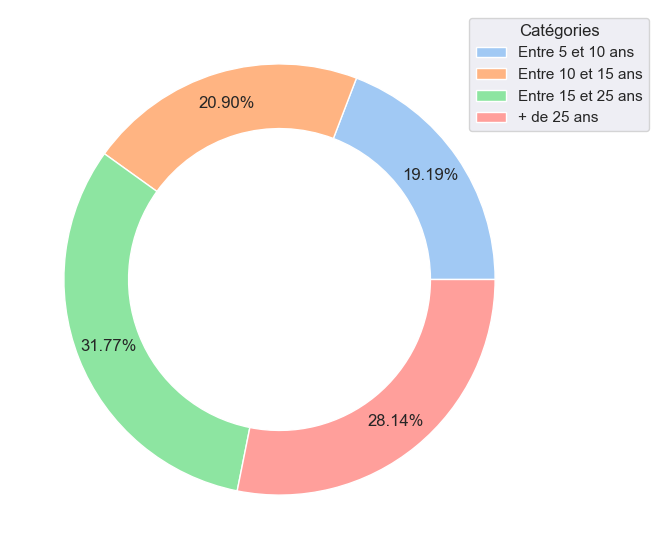

In [505]:
labels = count_ets
colors = sns.color_palette("pastel")
plt.figure(figsize=(7, 7))
plt.pie(count_ets, autopct='%.2f%%', colors=colors, wedgeprops=dict(width=0.3), pctdistance=0.85)
plt.legend(labels.index, loc="upper right", title="Catégories", bbox_to_anchor=(1.2, 1))
plt.show()

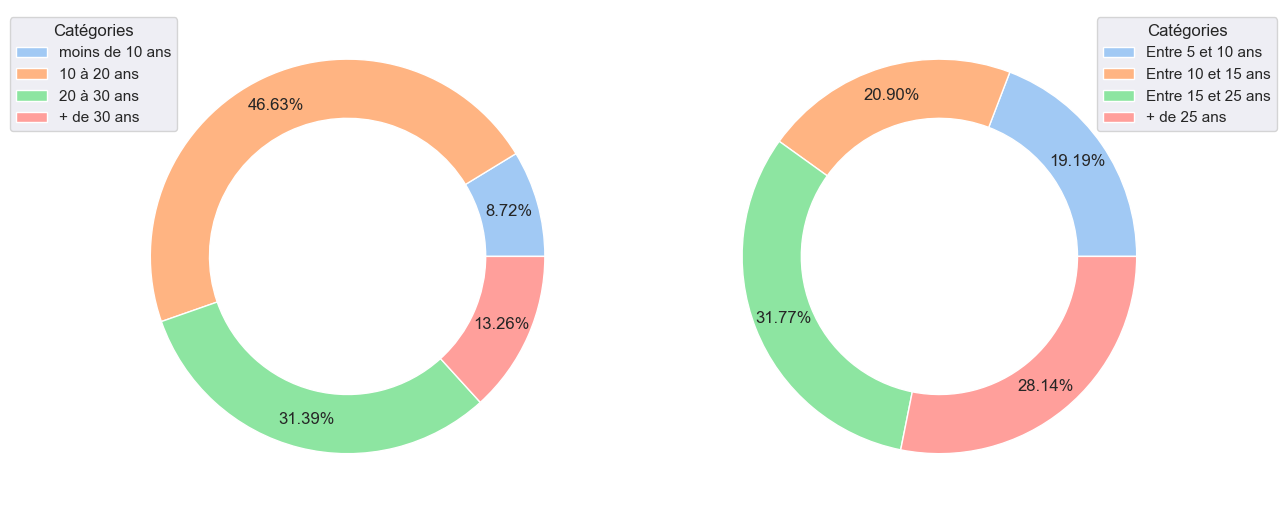

In [510]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

labels_eto = count_eto
colors_eto = sns.color_palette("pastel")
axes[0].pie(count_eto, autopct='%.2f%%', colors=colors_eto, wedgeprops=dict(width=0.3), pctdistance=0.85)
axes[0].legend(labels_eto.index, loc="upper left", title="Catégories", bbox_to_anchor=(-0.2, 1))


labels_ets = count_ets
colors_ets = sns.color_palette("pastel")
axes[1].pie(count_ets, autopct='%.2f%%', colors=colors_ets, wedgeprops=dict(width=0.3), pctdistance=0.85)
axes[1].legend(labels_ets.index, loc="upper right", title="Catégories", bbox_to_anchor=(1.2, 1))

plt.show()

In [514]:
CE['studyLevel'].value_counts()

studyLevel
Bac5        620
Bac4        108
Bac2         89
Bac3         78
Bac8         60
Bac          18
CAP, BEP      5
Name: count, dtype: int64

In [513]:
CE = remplacer(CE, 'studyLevel', ["Bac +5"], ['Bac5'])
CE = remplacer(CE, 'studyLevel', ["Bac + 8"], ['Bac8'])
CE = remplacer(CE, 'studyLevel', ["Bac + 3"], ['Bac3'])

In [517]:
studyLevel = CE.dropna(subset=['studyLevel'])

In [518]:
pctStudyLevel = studyLevel ['studyLevel'].value_counts()

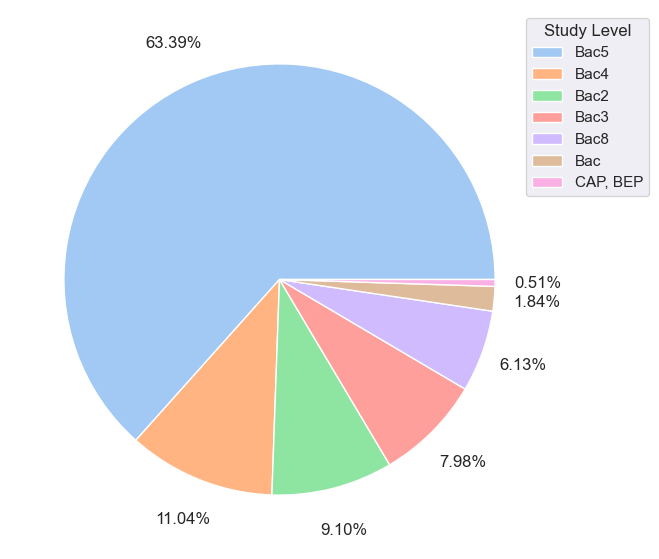

In [522]:
labels = pctStudyLevel
colors = sns.color_palette("pastel")
plt.figure(figsize=(7, 7))
plt.pie(pctStudyLevel, autopct='%.2f%%', colors=colors, pctdistance=1.2)
plt.legend(labels.index, loc="upper right", title="Study Level", bbox_to_anchor=(1.2, 1))
plt.show()